## Installs and API

In [1]:
import os
os.environ["OPENAI_API_KEY"] = ""
OPENAI_API_KEY = ""

In [ ]:
# Install required dependencies from the requirements file and specific PyTorch versions
!pip install torch==2.2.0+cu121 torchvision==0.17.0+cu121 torchaudio==2.2.0+cu121 --index-url https://download.pytorch.org/whl/cu121


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu121



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Verify if CUDA is available and display the GPU name
import torch
print(torch.cuda.get_device_name(0))  # GPU name


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\rbrul\Documents\GitHub\Agent-Tool-Integrations\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\rbrul\Documents\GitHub\Agent-Tool-Integrations\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\rbrul\Documents\GitHub\Agent-Tool-Integrations\.venv\Lib\site-packages\ipyk

True
NVIDIA GeForce RTX 4080 SUPER


## LangChain

In [2]:
# Import from LangChain
from langchain.tools import Tool, DuckDuckGoSearchResults
from langchain.llms import OpenAI
from langchain import PromptTemplate
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
from langchain_core.pydantic_v1 import BaseModel, Field
from deep_translator import GoogleTranslator
from langchain.memory import ConversationBufferMemory
import wikipedia
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from typing import List, Dict, Any, Tuple, Optional
import re
import nltk

ModuleNotFoundError: No module named 'langchain'

### QwenCoder Logic

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load the model
model_name = "Qwen/Qwen2.5-Coder-7B"  # or "Qwen/Qwen-7B-Instruct" if available
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,   # or torch.bfloat16 if your GPU supports it
    device_map="auto",           # automatically put on GPU if available
    trust_remote_code=True
)


KeyboardInterrupt: 

In [ ]:
# Define a function to interact with the QwenCoder model
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.2,   # low temp = more deterministic, better for code
        do_sample=True
    )
    result = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return result.split(prompt)[-1].strip()  # Only return the assistant's reply


In [ ]:
from langchain.tools import Tool

code_assistant_tool = Tool(
    name="LocalCodeAssistant",
    func=local_code_assistant,
    description="Helps generate, fix, and explain Python code locally using QwenCoder."
)


### Pandas Analysis Tool Logic
This section generates a sample dataset and performs basic analysis using Pandas.

In [ ]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)


# Generate sample data
n_rows = 1000

# Generate dates
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(n_rows)]

# Define data categories
makes = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan', 'BMW', 'Mercedes', 'Audi', 'Hyundai', 'Kia']
models = ['Sedan', 'SUV', 'Truck', 'Hatchback', 'Coupe', 'Van']
colors = ['Red', 'Blue', 'Black', 'White', 'Silver', 'Gray', 'Green']

# Create the dataset
data = {
    'Date': dates,
    'Make': np.random.choice(makes, n_rows),
    'Model': np.random.choice(models, n_rows),
    'Color': np.random.choice(colors, n_rows),
    'Year': np.random.randint(2015, 2023, n_rows),
    'Price': np.random.uniform(20000, 80000, n_rows).round(2),
    'Mileage': np.random.uniform(0, 100000, n_rows).round(0),
    'EngineSize': np.random.choice([1.6, 2.0, 2.5, 3.0, 3.5, 4.0], n_rows),
    'FuelEfficiency': np.random.uniform(20, 40, n_rows).round(1),
    'SalesPerson': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], n_rows)
}

# Create DataFrame and sort by date
df = pd.DataFrame(data).sort_values('Date')

# Display sample data and statistics
print("\nFirst few rows of the generated data:")
print(df.head())

print("\nDataFrame info:")
df.info()

print("\nSummary statistics:")
print(df.describe())


First few rows of the generated data:
        Date      Make  Model   Color  Year     Price  Mileage  EngineSize  \
0 2022-01-01     Honda    Van   Green  2021  27044.28  78913.0         1.6   
1 2022-01-02    Toyota    Van    Blue  2022  70485.31  38172.0         4.0   
2 2022-01-03    Nissan  Sedan  Silver  2017  25308.67  40089.0         2.5   
3 2022-01-04    Toyota    SUV    Blue  2018  22381.82  50492.0         3.5   
4 2022-01-05  Mercedes  Truck   White  2015  53677.16  73909.0         2.5   

   FuelEfficiency SalesPerson  
0            25.3         Bob  
1            22.2         Bob  
2            30.0         Eva  
3            36.5       David  
4            31.2       Alice  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Make            

In [ ]:
pandas_agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4", temperature=0, openai_api_key=OPENAI_API_KEY),
    df,
    verbose=True,
    allow_dangerous_code=True,  # Only set this if you're comfortable with code execution
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

<ipython-input-10-3ea9bb3d3ba5>:2: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  ChatOpenAI(model="gpt-4", temperature=0, openai_api_key=OPENAI_API_KEY),


### DuckDuckGo Logic

In [ ]:
search = DuckDuckGoSearchResults()
class SummarizeText(BaseModel):
    """Model for text to be summarized."""
    text: str = Field(..., title="Text to summarize", description="The text to be summarized")

In [ ]:
def parse_search_results(results_string: str) -> List[dict]:
    """Parse a string representation of search results into a list of dictionaries."""
    results = []
    entries = results_string.split(', snippet: ')
    for entry in entries[1:]:  # Skip the first split as it's empty
        parts = entry.split(', title: ')
        if len(parts) == 2:
            snippet = parts[0]
            title_link = parts[1].split(', link: ')
            if len(title_link) == 2:
                title, link = title_link
                results.append({
                    'snippet': snippet,
                    'title': title,
                    'link': link
                })
    return results

def perform_web_search(query: str, specific_site: Optional[str] = None) -> Tuple[List[str], List[Tuple[str, str]]]:
    """Perform a web search based on a query, optionally including a specific website."""
    try:
        if specific_site:
            specific_query = f"site:{specific_site} {query}"
            print(f"Searching for: {specific_query}")
            specific_results = search.run(specific_query)
            print(f"Specific search results: {specific_results}")
            specific_parsed = parse_search_results(specific_results)

            general_query = f"-site:{specific_site} {query}"
            print(f"Searching for: {general_query}")
            general_results = search.run(general_query)
            print(f"General search results: {general_results}")
            general_parsed = parse_search_results(general_results)

            combined_results = (specific_parsed + general_parsed)[:3]
        else:
            print(f"Searching for: {query}")
            web_results = search.run(query)
            print(f"Web results: {web_results}")
            combined_results = parse_search_results(web_results)[:3]

        web_knowledge = [result.get('snippet', '') for result in combined_results]
        sources = [(result.get('title', 'Untitled'), result.get('link', '')) for result in combined_results]

        print(f"Processed web_knowledge: {web_knowledge}")
        print(f"Processed sources: {sources}")
        return web_knowledge, sources
    except Exception as e:
        print(f"Error in perform_web_search: {str(e)}")
        import traceback
        traceback.print_exc()
        return [], []

def summarize_text(text: str, source: Tuple[str, str]) -> str:
    """Summarize the given text using OpenAI's language model."""
    try:
        # Instantiate your ChatOpenAI with a desired model and temperature.
        llm = ChatOpenAI(temperature=0.7, model="gpt-4o-mini",openai_api_key=OPENAI_API_KEY)
        prompt_template = "Please summarize the following text in a listed bullet point format:\n\n{text}\n\nSummary:"
        prompt = PromptTemplate(
            template=prompt_template,
            input_variables=["text"],
        )
        # Chain the prompt with the LLM (here we use a simple invocation)
        summary_chain = prompt | llm
        input_data = {"text": text}
        summary = summary_chain.invoke(input_data)

        # If the summary has a content attribute, use it; otherwise convert to string.
        summary_content = summary.content if hasattr(summary, 'content') else str(summary)
        formatted_summary = f"Source: {source[0]} ({source[1]})\n{summary_content.strip()}\n"
        return formatted_summary
    except Exception as e:
        print(f"Error in summarize_text: {str(e)}")
        return ""

def search_summarize(query: str, specific_site: Optional[str] = None) -> str:
    """Perform a web search and summarize the results."""
    web_knowledge, sources = perform_web_search(query, specific_site)

    if not web_knowledge or not sources:
        print("No web knowledge or sources found.")
        return ""

    # Create a list of summaries—only add non-empty summaries
    summaries = []
    for knowledge, source in zip(web_knowledge, sources):
        summary = summarize_text(knowledge, source)
        if summary:
            summaries.append(summary)

    combined_summary = "\n".join(summaries)
    return combined_summary

# -------------------------------------------------------------------
# Wrap the above `search_summarize` function as a LangChain Tool
# -------------------------------------------------------------------

duckduckgo_search_summarize_tool = Tool(
    name="DuckDuckGoSearchSummarize",
    func=search_summarize,
    description=(
        "Performs a web search using DuckDuckGo based on the input query "
        "and summarizes the top 3 search results using an OpenAI LLM. "
        "Optionally, you can restrict the search to a specific site by providing the 'specific_site' parameter."
    )
)




### Inital Tools Test and Output

In [ ]:
# Calculator Tool (basic arithmetic)
def calculator_tool(expression: str) -> str:
    try:
        result = eval(expression)  # In production, consider a safer math parser.
        return f"The result of '{expression}' is {result}."
    except Exception as e:
        return f"Error evaluating expression '{expression}': {e}"

calculator = Tool(
    name="Calculator",
    func=calculator_tool,
    description="Evaluates simple mathematical expressions, e.g. '2+2'."
)

# Python Code Execution Tool
def code_execution_tool(code: str) -> str:
    """
    Executes Python code in a restricted environment.
    WARNING: Using exec can be a security risk. Use a sandbox in production.
    """
    import io
    import contextlib

    output_buffer = io.StringIO()
    try:
        with contextlib.redirect_stdout(output_buffer):
            exec(code, {"__builtins__": {}})
        return output_buffer.getvalue() or "Code executed successfully with no output."
    except Exception as e:
        return f"Error executing code: {str(e)}"

code_executor = Tool(
    name="CodeExecutor",
    func=code_execution_tool,
    description="Executes a snippet of Python code and returns its output. Use carefully!"
)

# Wikipedia Summary Tool
def wikipedia_tool(query: str) -> str:
    try:
        summary = wikipedia.summary(query, sentences=2)
        return summary
    except Exception as e:
        return f"Could not retrieve Wikipedia summary for '{query}': {str(e)}"

wikipedia_search = Tool(
    name="WikipediaSearch",
    func=wikipedia_tool,
    description="Looks up a summary of a topic using Wikipedia."
)

# Translation Tool (using deep-translator)
def translation_tool(text: str, target_language: str = "en") -> str:
    try:
        translated_text = GoogleTranslator(source='auto', target=target_language).translate(text)
        return f"Translated text: {translated_text}"
    except Exception as e:
        return f"Translation error: {str(e)}"

translator = Tool(
    name="Translator",
    func=translation_tool,
    description="Translates the given text into a specified language (default is English)."
)

# Sentiment Analysis Tool (simple keyword-based approach)
def sentiment_analysis_tool(text: str) -> str:
    lower_text = text.lower()
    if any(word in lower_text for word in ["happy", "excellent", "great", "good"]):
        return "Positive sentiment detected."
    elif any(word in lower_text for word in ["sad", "bad", "terrible", "awful"]):
        return "Negative sentiment detected."
    else:
        return "Neutral or no clear sentiment detected."

sentiment_analyzer = Tool(
    name="SentimentAnalysis",
    func=sentiment_analysis_tool,
    description="Analyzes the sentiment of a given text (positive, negative, or neutral)."
)


def pandas_analysis_tool(query: str) -> str:
    """
    This tool calls the Pandas DataFrame agent with a natural language query.
    Returns the agent's response as a string.
    """
    try:
        response = pandas_agent.run(query)
        return str(response)
    except Exception as e:
        return f"Error in Pandas DataFrame tool: {str(e)}"

pandas_tool = Tool(
    name="PandasDataAnalysis",
    func=pandas_analysis_tool,
    description=(
        "Use this tool to ask questions about the loaded Pandas DataFrame. "
        "For example, you can filter, describe statistics, or transform the data."
    )
)

duckduckgo_search_summarize_tool = Tool(
    name="DuckDuckGoSearchSummarize",
    func=search_summarize,
    description=(
        "Performs a web search using DuckDuckGo based on the input query "
        "and summarizes the top 3 search results using an OpenAI LLM. "
        "Optionally, you can restrict the search to a specific site by providing the 'specific_site' parameter."
    )
)

# --- 3. Combine Tools into a Single Agent -------------------------------------

tools = [
    calculator,
    code_executor,
    wikipedia_search,
    translator,
    sentiment_analyzer,
    pandas_tool,
    duckduckgo_search_summarize_tool
]

In [ ]:
# Initialize the OpenAI language model with your API key.
# Replace 'your_openai_api_key_here' with your actual API key.
llm = ChatOpenAI(model="gpt-4", temperature=0, openai_api_key=OPENAI_API_KEY)

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# Initialize the agent with the provided tool and language model.
agent = initialize_agent(
    tools=tools,
    llm=llm,
    allow_dangerous_code=True,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # ReAct agent
    verbose=True,  # see chain-of-thought reasoning
    memory=memory
)

In [ ]:
query = (
        """
        1) Calculate 3*7.
        2) Check a brief Wikipedia summary about 'Large language models'.
        3) Translate the summary to Spanish.
        4) Analyze if the text is positive or negative.
        5) Summarize it in 1 paragraph.
        6) Then show me a simulated web search on that topic.
        """
        )

print("USER QUERY:", query)
result = agent.run(query)
print("\nAGENT RESULT:\n", result)

In [ ]:

query = (
    """
    "Search online the benefits of renewable energy"
    """
)

print("USER QUERY:", query)
result = agent.run(query)
print("\nAGENT RESULT:\n", result)

### Tree Of Thought Simple Example

In [ ]:
#!/usr/bin/env python
import os
from typing import List
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.tools import Tool

# -------------------------------
# Reasoner Agent: Generate Multiple Reasoning Paths
# -------------------------------
def generate_reasoning_paths(query: str, num_paths: int = 3) -> List[str]:
    """
    Generates multiple distinct reasoning paths for a given query.
    Uses a Tree-of-Thought style prompt to have the LLM propose different paths.
    """
    llm = ChatOpenAI(temperature=0.7, model="gpt-4", openai_api_key=OPENAI_API_KEY)
    prompt_template = PromptTemplate(
        template=(
            "You are a reasoning agent. Given the following query: '{query}', "
            "generate {num_paths} distinct reasoning paths. "
            "For each path, include detailed chain-of-thought steps and a final answer. "
            "Format your response as follows:\n\n"
            "Path 1:\n<reasoning steps>\nAnswer: <final answer>\n\n"
            "Path 2:\n<reasoning steps>\nAnswer: <final answer>\n\n"
            "Path 3:\n<reasoning steps>\nAnswer: <final answer>\n\n"
            "Ensure each path is logically sound."
        ),
        input_variables=["query", "num_paths"]
    )
    prompt = prompt_template.format(query=query, num_paths=num_paths)
    response = llm.predict(prompt)
    # Assume the response is structured with "Path 1:" markers
    paths = []
    for segment in response.split("Path "):
        segment = segment.strip()
        if segment:
            # Prepend "Path " back to each segment for clarity
            paths.append("Path " + segment)
    return paths[:num_paths]

# -------------------------------
# Thought Validator Agent: Validate Reasoning
# -------------------------------
def validate_reasoning_path(reasoning: str) -> bool:
    """
    Validates a reasoning path using a dedicated prompt.
    Returns True if the reasoning is valid, or False otherwise.
    """
    llm = ChatOpenAI(temperature=0.5, model="gpt-4", openai_api_key=OPENAI_API_KEY)
    prompt_template = PromptTemplate(
        template=(
            "You are a Thought Validator. Evaluate the following reasoning chain "
            "and determine if it is logically sound, factually accurate, and complete.\n\n"
            "Reasoning:\n{reasoning}\n\n"
            "Respond with only 'Valid' if the reasoning is acceptable, or 'Invalid' if it is not, "
            "followed by a brief explanation."
        ),
        input_variables=["reasoning"]
    )
    prompt = prompt_template.format(reasoning=reasoning)
    validation_response = llm.predict(prompt)
    # If response starts with "Valid" (ignore case), then consider it valid
    if validation_response.strip().lower().startswith("valid"):
        return True
    else:
        return False

# -------------------------------
# Combined Multi-Agent ToT Reasoner with Thought Validator
# -------------------------------
def multi_agent_tot_reasoner(query: str) -> str:
    """
    Orchestrates the multi-agent Tree-of-Thought reasoning process:
      1. Generates multiple reasoning paths for the query.
      2. Validates each path.
      3. Selects a consensus (first valid) path.
      4. Returns a detailed output showing all reasoning paths along with their validation status,
         the chosen consensus path, and the final answer extracted from that path.
    """
    # Generate multiple reasoning paths
    paths = generate_reasoning_paths(query, num_paths=3)

    # Validate each path and record its status (True=Valid, False=Invalid)
    valid_flags = []
    for path in paths:
        is_valid = validate_reasoning_path(path)
        valid_flags.append(is_valid)

    # Select the first valid path; if none are valid, choose the first path as a fallback
    consensus_idx = None
    for i, valid in enumerate(valid_flags):
        if valid:
            consensus_idx = i
            break
    if consensus_idx is None:
        consensus_idx = 0  # Fallback if no path is valid

    consensus_path = paths[consensus_idx]

    # Extract the final answer from the consensus path
    # Look for a line that starts with "Answer:" (case-insensitive)
    final_answer = "No final answer found."
    for line in consensus_path.splitlines():
        if line.strip().lower().startswith("answer:"):
            final_answer = line.split("Answer:", 1)[1].strip()
            break

    # Build a string that includes all paths and marks each as VALID/INVALID
    all_paths_str = ""
    for i, (path, is_valid) in enumerate(zip(paths, valid_flags), start=1):
        status = "VALID" if is_valid else "INVALID"
        all_paths_str += f"--- Path {i} ({status}) ---\n{path}\n\n"

    result = (
        f"All Generated Reasoning Paths:\n{all_paths_str}"
        f"--- Consensus Path (Path {consensus_idx+1}) ---\n{consensus_path}\n\n"
        f"Final Answer: {final_answer}"
    )
    return result

# -------------------------------
# Wrap as a LangChain Tool
# -------------------------------
tot_reasoner_tool = Tool(
    name="MultiAgentToTReasoner",
    func=multi_agent_tot_reasoner,
    description=(
        "A multi-agent Tree-of-Thought reasoning tool with a Thought Validator. "
        "Generates multiple reasoning paths for a given query, validates them, "
        "and returns all paths (with their VALID/INVALID status), along with a consensus reasoning "
        "and the final answer extracted from it."
    )
)

In [ ]:
# -------------------------------
# Example Integration into a LangChain Agent
# -------------------------------
if __name__ == "__main__":
    # Set your API key here or use your environment configuration
    os.environ["OPENAI_API_KEY"] = ""

    # Example query for complex reasoning
    query = "How can I optimize a sorting algorithm in Python for large datasets?"
    answer = tot_reasoner_tool.func(query)
    print("Multi-Agent ToT Reasoner Tool Output:\n", answer)

### Memory Types Testing - Episodic

In [ ]:
import os
from typing import Any, Dict, List
from taskweaver.agent import Agent as TaskWeaverAgent
from langchain import LLMChain
from langchain.schema import BaseMemory
from langchain.memory import ConversationBufferMemory, CombinedMemory
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType, Tool
from langchain.embeddings.openai import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# --- Define your tools -----------------------------------------------------

# Calculator Tool (basic arithmetic)
def calculator_tool(expression: str) -> str:
    try:
        result = eval(expression)  # In production, consider a safer math parser.
        return f"The result of '{expression}' is {result}."
    except Exception as e:
        return f"Error evaluating expression '{expression}': {e}"

calculator = Tool(
    name="Calculator",
    func=calculator_tool,
    description="Evaluates simple mathematical expressions, e.g. '2+2'."
)

# Python Code Execution Tool
def code_execution_tool(code: str) -> str:
    """
    Executes Python code in a restricted environment.
    WARNING: Using exec can be a security risk. Use a sandbox in production.
    """
    import io
    import contextlib

    output_buffer = io.StringIO()
    try:
        with contextlib.redirect_stdout(output_buffer):
            exec(code, {"__builtins__": {}})
        return output_buffer.getvalue() or "Code executed successfully with no output."
    except Exception as e:
        return f"Error executing code: {str(e)}"

code_executor = Tool(
    name="CodeExecutor",
    func=code_execution_tool,
    description="Executes a snippet of Python code and returns its output. Use carefully!"
)

# Wikipedia Summary Tool
def wikipedia_tool(query: str) -> str:
    try:
        summary = wikipedia.summary(query, sentences=2)
        return summary
    except Exception as e:
        return f"Could not retrieve Wikipedia summary for '{query}': {str(e)}"

wikipedia_search = Tool(
    name="WikipediaSearch",
    func=wikipedia_tool,
    description="Looks up a summary of a topic using Wikipedia."
)

# Translation Tool (using deep-translator)
def translation_tool(text: str, target_language: str = "en") -> str:
    try:
        translated_text = GoogleTranslator(source='auto', target=target_language).translate(text)
        return f"Translated text: {translated_text}"
    except Exception as e:
        return f"Translation error: {str(e)}"

translator = Tool(
    name="Translator",
    func=translation_tool,
    description="Translates the given text into a specified language (default is English)."
)

# Sentiment Analysis Tool (simple keyword-based approach)
def sentiment_analysis_tool(text: str) -> str:
    lower_text = text.lower()
    if any(word in lower_text for word in ["happy", "excellent", "great", "good"]):
        return "Positive sentiment detected."
    elif any(word in lower_text for word in ["sad", "bad", "terrible", "awful"]):
        return "Negative sentiment detected."
    else:
        return "Neutral or no clear sentiment detected."

sentiment_analyzer = Tool(
    name="SentimentAnalysis",
    func=sentiment_analysis_tool,
    description="Analyzes the sentiment of a given text (positive, negative, or neutral)."
)


def pandas_analysis_tool(query: str) -> str:
    """
    This tool calls the Pandas DataFrame agent with a natural language query.
    Returns the agent's response as a string.
    """
    try:
        response = pandas_agent.run(query)
        return str(response)
    except Exception as e:
        return f"Error in Pandas DataFrame tool: {str(e)}"

pandas_tool = Tool(
    name="PandasDataAnalysis",
    func=pandas_analysis_tool,
    description=(
        "Use this tool to ask questions about the loaded Pandas DataFrame. "
        "For example, you can filter, describe statistics, or transform the data."
    )
)

duckduckgo_search_summarize_tool = Tool(
    name="DuckDuckGoSearchSummarize",
    func=search_summarize,
    description=(
        "Performs a web search using DuckDuckGo based on the input query "
        "and summarizes the top 3 search results using an OpenAI LLM. "
        "Optionally, you can restrict the search to a specific site by providing the 'specific_site' parameter."
    )
)



# --- Combine Tools into a Single Agent -------------------------------------

tools = [
    calculator,
    code_executor,
    wikipedia_search,
    translator,
    sentiment_analyzer,
    pandas_tool,
    duckduckgo_search_summarize_tool
]


# --- Long-term Memory & QA Cache Helpers -----------------------------------

_long_term_store: Dict[str, List[str]] = {}
_qa_cache: Dict[str, str] = {}
_qa_embeddings: Dict[str, List[float]] = {}

def update_long_term_memory(session_id: str, user_input: str, assistant_output: str) -> None:
    mem = _long_term_store.setdefault(session_id, [])
    if user_input:
        mem.append(f"User said: {user_input}")
    if assistant_output:
        mem.append(f"Assistant responded: {assistant_output}")
    _long_term_store[session_id] = mem[-10:]

def get_long_term_memory(session_id: str) -> str:
    return "\n".join(_long_term_store.get(session_id, []))

# setup embedding model
embeddings = OpenAIEmbeddings(
    openai_api_key=OPENAI_API_KEY)


# --- Implement LongTermChatMemory -----------------------------------------

class LongTermChatMemory(BaseMemory):
    session_id: str

    @property
    def memory_key(self) -> str:
        return "long_term_memory"

    @property
    def memory_variables(self) -> List[str]:
        return [self.memory_key]

    def load_memory_variables(self, inputs: Dict[str, Any]) -> Dict[str, str]:
        return {self.memory_key: get_long_term_memory(self.session_id)}

    def save_context(self, inputs: Dict[str, Any], outputs: Dict[str, Any]) -> None:
        update_long_term_memory(
            self.session_id,
            inputs.get("input", ""),
            outputs.get("output", ""),
        )

    def clear(self) -> None:
        _long_term_store[self.session_id] = []

# --- Build CombinedMemory for a single session -----------------------------

SESSION_ID = "user_123"
short_term = ConversationBufferMemory(
    memory_key="chat_history",
    input_key="input",
    return_messages=True,
)
long_term = LongTermChatMemory(session_id=SESSION_ID)
combined_memory = CombinedMemory(memories=[short_term, long_term])

# --- Pure Chat LLMChain setup ---------------------------------------------

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI assistant."),
    ("system", "Conversation so far:\n{chat_history}"),
    ("system", "Long‑term memory:\n{long_term_memory}"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
])
llm = ChatOpenAI(
    model="gpt-4",
    temperature=0,
    openai_api_key=OPENAI_API_KEY
)
chat_chain = LLMChain(
    prompt=prompt,
    llm=llm,
    memory=combined_memory,
)

# --- Initialize the ReAct agent with memory -------------------------------

agent = initialize_agent(
    tools=tools,
    llm=llm,
    memory=combined_memory,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
     handle_parsing_errors=True,  # allow agent to retry on parse failures
    verbose=True,
)

# --- Dispatcher & Semantic Cache ------------------------------------------

TOOL_KEYWORDS = [
    "calculate", "translate", "search", "list", "give me", "find",
    "what is", "what are", "who is", "summarize", "analyze",
]

SIMILARITY_THRESHOLD = 0.85

def is_tool_query(text: str) -> bool:
    low = text.strip().lower()
    for kw in TOOL_KEYWORDS:
        if low.startswith(kw):
            return True
    if ";" in text or "\n" in text:
        return True
    return False


def find_similar_cached(query: str) -> str:
    vec = np.array(embeddings.embed_query(query)).reshape(1, -1)
    for orig, orig_vec in _qa_embeddings.items():
        sim = cosine_similarity(vec, np.array(orig_vec).reshape(1, -1))[0][0]
        if sim >= SIMILARITY_THRESHOLD:
            return orig
    return None


def converse(user_input: str) -> str:
    low = user_input.lower().strip()
    # memory recall shortcut
    if "remember" in low or "previous" in low or "asked you" in low:
        memory = get_long_term_memory(SESSION_ID)
        return f"Here's what I remember:\n{memory}"

    if is_tool_query(user_input):
        # semantic cache lookup
        similar = find_similar_cached(user_input)
        if similar:
            return _qa_cache[similar]
        # run agent
        result = agent.run(user_input)
        # cache text and embedding
        _qa_cache[user_input] = result
        _qa_embeddings[user_input] = embeddings.embed_query(user_input)
        return result

    # fallback to pure chat
    return chat_chain.run(user_input)


In [ ]:
# ————————————————————————————————
# 8) Example Usage
# ————————————————————————————————

print("AI:", converse("Do you remember our previous questions?"))
print("AGENT:", converse("Search and find me a list of the most popular foods in the world."))

In [ ]:
print("AGENT:", converse("Do you remember our previous questions?"))
print("AGENT:", converse("Search and find me a list of the most popular foods in the world."))

In [ ]:
print("AGENT:", converse("What are the most popular foods you found?"))

In [ ]:
try:
    from langgraph.graph import Graph
    from IPython.display import Image, display
    from langchain_core.runnables.graph import MermaidDrawMethod

    # Create a simple Graph to illustrate memory lifecycle
    workflow = Graph()

    # Node functions operate on a shared state dict
    def load_memory(state: Dict[str, Any]) -> Dict[str, Any]:
        # Load from long-term store into state
        state['memory'] = get_long_term_memory(SESSION_ID).split("")
        return state

    def use_memory(state: Dict[str, Any]) -> Dict[str, Any]:
        # Placeholder: use memory in reasoning
        return state

    def save_memory(state: Dict[str, Any]) -> Dict[str, Any]:
        # Save any updates back to long-term store
        update_long_term_memory(SESSION_ID, state.get('input', ''), state.get('output', ''))
        return state

    # Add nodes and define workflow
    workflow.add_node('LoadMemory', load_memory)
    workflow.add_node('UseMemory', use_memory)
    workflow.add_node('SaveMemory', save_memory)

    # Set entry and finish points
    workflow.set_entry_point('LoadMemory')
    workflow.add_edge('LoadMemory', 'UseMemory')
    workflow.add_edge('UseMemory', 'SaveMemory')
    workflow.set_finish_point('SaveMemory')

    # Compile the workflow (optional)
    compiled = workflow.compile()
    # Print out the workflow nodes directly from the Graph instance
    print('Memory Workflow nodes:', workflow.nodes)

except Exception as e:
    print('LangGraph Graph unavailable:', e)


In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode

# Define the state schema (placeholder fields)
class AgentState(TypedDict):
    chat_history: List[Any]
    long_term_memory: str

# Initialize the StateGraph
graph_builder = StateGraph(state_schema=AgentState)

# 1) Add each tool as a ToolNode
for tool in tools:
    graph_builder.add_node(tool.name, ToolNode([tool]))

# 2) Add memory nodes (loading short- and long-term memory)
def load_short_term(state: AgentState) -> AgentState:
    state['chat_history'] = short_term.load_memory_variables({})['chat_history']
    return state

def load_long_term(state: AgentState) -> AgentState:
    state['long_term_memory'] = long_term.load_memory_variables({})['long_term_memory']
    return state

graph_builder.add_node('LoadShortTermMemory', load_short_term)
graph_builder.add_node('LoadLongTermMemory', load_long_term)

# 3) Add CombinedMemory node which merges both memories
def combine_memory(state: AgentState) -> AgentState:
    # This node symbolizes the CombinedMemory action
    return state

graph_builder.add_node('CombineMemory', combine_memory)

# 4) Add Agent Initialization node
def init_agent(state: AgentState) -> AgentState:
    # Placeholder: agent would be initialized with tools and memory here
    return state

graph_builder.add_node('AgentInit', init_agent)

# 5) Define the workflow edges
# Start -> load memories
graph_builder.add_edge(START, 'LoadShortTermMemory')
graph_builder.add_edge(START, 'LoadLongTermMemory')
# Memories -> combine
graph_builder.add_edge('LoadShortTermMemory', 'CombineMemory')
graph_builder.add_edge('LoadLongTermMemory', 'CombineMemory')
# Tools feed into agent init
for tool in tools:
    graph_builder.add_edge(tool.name, 'CombineMemory')
# CombinedMemory -> AgentInit
graph_builder.add_edge('CombineMemory', 'AgentInit')
# AgentInit -> End
graph_builder.add_edge('AgentInit', END)

compiled = graph_builder.compile(checkpointer=combined_memory)
graph = compiled.get_graph()

# Render using Mermaid draw method
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display

try:
    # Render PNG via the API method
    png_bytes = graph.draw_mermaid_png(
        draw_method=MermaidDrawMethod.API
    )
    display(Image(png_bytes))
except Exception as e:
    # Fallback: output Mermaid text source
    mermaid_code = graph.draw_mermaid()
    print("Mermaid source fallback:", mermaid_code)
    print("Failed to render PNG:", e)



In [ ]:
from IPython.display import Image
Image("/content/Mermaid_Memory_PNG.png")

## LangGraph

### Router Logic Test

In [ ]:
import os
from typing import Any, Dict, List
import subprocess
from langchain import LLMChain
from langchain.schema import BaseMemory
from langchain.memory import ConversationBufferMemory, CombinedMemory
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType, Tool
from langchain.embeddings.openai import OpenAIEmbeddings
from deep_translator import GoogleTranslator
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



# --- Define your tools -----------------------------------------------------

# Calculator Tool (basic arithmetic)
def calculator_tool(expression: str) -> str:
    try:
        result = eval(expression)  # In production, consider a safer math parser.
        return f"The result of '{expression}' is {result}."
    except Exception as e:
        return f"Error evaluating expression '{expression}': {e}"

calculator = Tool(
    name="Calculator",
    func=calculator_tool,
    description="Evaluates simple mathematical expressions, e.g. '2+2'."
)

# Python Code Execution Tool
def code_execution_tool(code: str) -> str:
    """
    Executes Python code in a restricted environment.
    WARNING: Using exec can be a security risk. Use a sandbox in production.
    """
    import io
    import contextlib

    output_buffer = io.StringIO()
    try:
        with contextlib.redirect_stdout(output_buffer):
            exec(code, {"__builtins__": {}})
        return output_buffer.getvalue() or "Code executed successfully with no output."
    except Exception as e:
        return f"Error executing code: {str(e)}"

code_executor = Tool(
    name="CodeExecutor",
    func=code_execution_tool,
    description="Executes a snippet of Python code and returns its output. Use carefully!"
)

# Wikipedia Summary Tool
def wikipedia_tool(query: str) -> str:
    try:
        summary = wikipedia.summary(query, sentences=2)
        return summary
    except Exception as e:
        return f"Could not retrieve Wikipedia summary for '{query}': {str(e)}"

wikipedia_search = Tool(
    name="WikipediaSearch",
    func=wikipedia_tool,
    description="Looks up a summary of a topic using Wikipedia."
)

# Translation Tool (using deep-translator)
def translation_tool(text: str, target_language: str = "en") -> str:
    try:
        translated_text = GoogleTranslator(source='auto', target=target_language).translate(text)
        return f"Translated text: {translated_text}"
    except Exception as e:
        return f"Translation error: {str(e)}"

translator = Tool(
    name="Translator",
    func=translation_tool,
    description="Translates the given text into a specified language (default is English)."
)

# Sentiment Analysis Tool (simple keyword-based approach)
def sentiment_analysis_tool(text: str) -> str:
    lower_text = text.lower()
    if any(word in lower_text for word in ["happy", "excellent", "great", "good"]):
        return "Positive sentiment detected."
    elif any(word in lower_text for word in ["sad", "bad", "terrible", "awful"]):
        return "Negative sentiment detected."
    else:
        return "Neutral or no clear sentiment detected."

sentiment_analyzer = Tool(
    name="SentimentAnalysis",
    func=sentiment_analysis_tool,
    description="Analyzes the sentiment of a given text (positive, negative, or neutral)."
)


def pandas_analysis_tool(query: str) -> str:
    """
    This tool calls the Pandas DataFrame agent with a natural language query.
    Returns the agent's response as a string.
    """
    try:
        response = pandas_agent.run(query)
        return str(response)
    except Exception as e:
        return f"Error in Pandas DataFrame tool: {str(e)}"

pandas_tool = Tool(
    name="PandasDataAnalysis",
    func=pandas_analysis_tool,
    description=(
        "Use this tool to ask questions about the loaded Pandas DataFrame. "
        "For example, you can filter, describe statistics, or transform the data."
    )
)

duckduckgo_search_summarize_tool = Tool(
    name="DuckDuckGoSearchSummarize",
    func=search_summarize,
    description=(
        "Performs a web search using DuckDuckGo based on the input query "
        "and summarizes the top 3 search results using an OpenAI LLM. "
        "Optionally, you can restrict the search to a specific site by providing the 'specific_site' parameter."
    )
)

# code_assistant_tool = Tool(
#     name="LocalCodeAssistant",
#     func=local_code_assistant,
#     description="Helps generate, fix, and explain Python code locally using QwenCoder."
# )


# --- Combine Tools into a Single Agent -------------------------------------

tools = [
    calculator,
    code_executor,
    wikipedia_search,
    translator,
    sentiment_analyzer,
    pandas_tool,
    duckduckgo_search_summarize_tool,
    # code_assistant_tool
]

NameError: name 'search_summarize' is not defined

In [ ]:
from typing import TypedDict, Any, Dict
import re

from langgraph.graph import StateGraph, START, END

# --- State schema -------------------------------------------------------------
class RouterState(TypedDict):
    input: str
    decision: str
    output: Any

# --- 1) Routing logic ---------------------------------------------------------
def llm_call_router(state: RouterState) -> RouterState:
    text = state["input"].strip().lower()
    if text.startswith("calculate") or re.match(r"^[0-9+\-*/\s\.]+$", text):
        state["decision"] = "Calculator"
    elif text.startswith("translate"):
        state["decision"] = "Translator"
    elif "sql" in text or "database" in text:
        state["decision"] = "PandasDataAnalysis"
    elif "summary" in text or text.startswith("give me a summary"):
        state["decision"] = "WikipediaSearch"
    elif text.startswith(("search", "find", "what is")):
        state["decision"] = "DuckDuckGoSearchSummarize"
    elif any(keyword in text for keyword in ["write a function", "python code", "fix this code", "explain this code", "Write a Python function"]):
        state["decision"] = "CodeAssistant"
    else:
        state["decision"] = "WikipediaSearch"
    return state



# --- 2) Tool runners ---------------------------------------------------------

def run_Calculator(state: RouterState) -> RouterState:
    expr = re.sub(r'^(calculate|calc)\s+', '', state["input"], flags=re.IGNORECASE)
    state["output"] = calculator_tool(expr)
    return state

def run_Translator(state: RouterState) -> RouterState:
    m = re.match(r'translate\s+[\'"](.+?)[\'"]\s+to\s+(\w+)', state["input"], flags=re.IGNORECASE)
    if m:
        txt, lang = m.group(1), m.group(2)
    else:
        txt, lang = state["input"], "en"
    state["output"] = translation_tool(txt, lang)
    return state

def run_CodeExecutor(state: RouterState) -> RouterState:
    state["output"] = code_execution_tool(state["input"])
    return state

def run_WikipediaSearch(state: RouterState) -> RouterState:
    # strip off any “give me a summary on” prefix
    topic = re.sub(r'^(give me a summary (on|of)\s+)', '', state["input"], flags=re.IGNORECASE)
    summary = wikipedia_tool(topic)
    if summary.startswith("Could not retrieve"):
        # fallback to web search bullets
        raw = search_summarize(topic)
        bullets = [line for line in raw.splitlines() if line.strip().startswith("-")]
        state["output"] = "\n".join(bullets) or raw
    else:
        state["output"] = summary
    return state

def run_SentimentAnalysis(state: RouterState) -> RouterState:
    state["output"] = sentiment_analysis_tool(state["input"])
    return state

def run_PandasDataAnalysis(state: RouterState) -> RouterState:
    state["output"] = pandas_analysis_tool(state["input"])
    return state

def run_DuckDuckGoSearchSummarize(state: RouterState) -> RouterState:
    raw = search_summarize(state["input"])
    # only keep the bullet points
    bullets = [line for line in raw.splitlines() if line.strip().startswith("-")]
    state["output"] = "\n".join(bullets) or raw
    return state

def run_CodeAssistant(state: RouterState) -> RouterState:
    state["output"] = code_assistant_tool(state["input"])
    return state


# Map tool names to runner functions
tool_funcs = {
    "Calculator": run_Calculator,
    "Translator": run_Translator,
    "CodeExecutor": run_CodeExecutor,
    "WikipediaSearch": run_WikipediaSearch,
    "SentimentAnalysis": run_SentimentAnalysis,
    "PandasDataAnalysis": run_PandasDataAnalysis,
    "DuckDuckGoSearchSummarize": run_DuckDuckGoSearchSummarize,
    "CodeAssistant": run_CodeAssistant,
}


# --- 3) Build & wire the router ----------------------------------------------
router_builder = StateGraph(state_schema=RouterState)

router_builder.add_node("llm_call_router", llm_call_router)
for name, fn in tool_funcs.items():
    router_builder.add_node(name, fn)

router_builder.add_edge(START, "llm_call_router")
router_builder.add_conditional_edges(
    "llm_call_router",
    lambda st: st["decision"],
    {name: name for name in tool_funcs},
)
for name in tool_funcs:
    router_builder.add_edge(name, END)
router_builder.set_entry_point("llm_call_router")

# --- 4) Compile & test -------------------------------------------------------
router_workflow = router_builder.compile()

tests = [
    "Calculate 3 * 8",
    "Translate 'hello' to spanish",
    "Check a brief Wikipedia summary about 'Large language models'.",
    "What are the most popular foods in the world?",
    # "Write a function that creates a square in my output"
]

for q in tests:
    state = router_workflow.invoke({"input": q})
    print(f">>> {q!r}")
    print("→ Routed to:", state["decision"])
    print("→ Output   :\n", state["output"], "\n")

>>> 'Calculate 3 * 8'
→ Routed to: Calculator
→ Output   :
 The result of '3 * 8' is 24. 

>>> "Translate 'hello' to spanish"
→ Routed to: Translator
→ Output   :
 Translated text: Hola 

Searching for: Check a brief Wikipedia summary about 'Large language models'.
Web results: snippet: A large language model is a type of artificial intelligence algorithm that applies neural network techniques with lots of parameters to process and understand human languages or text using self-supervised learning techniques. Tasks like text generation, machine translation, summary writing, image generation from texts, machine coding, chat-bots ..., title: What is a Large Language Model (LLM) - GeeksforGeeks, link: https://www.geeksforgeeks.org/large-language-model-llm/, snippet: Language models serve as a cornerstone in natural language processing, utilizing mathematical methods to generalize language laws and knowledge for prediction and generation. Over extensive research spanning decades, language m

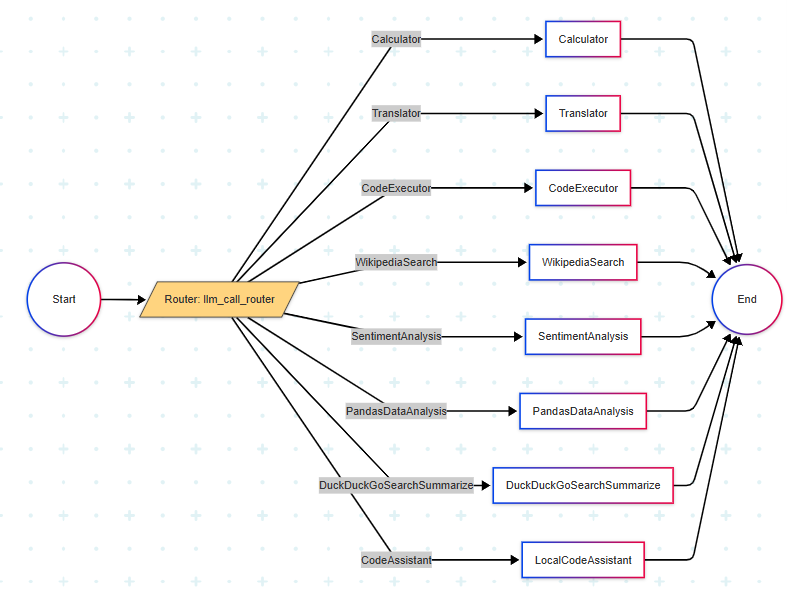

In [ ]:
from IPython.display import Image
Image("/Router-Logic-Test.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Router Logic With Memory - Episodic

In [ ]:
# agent_router_with_memory.py

import os
import re
import numpy as np
from typing import Any, Dict, List, TypedDict

from langchain import LLMChain
from langchain.schema import BaseMemory
from langchain.memory import ConversationBufferMemory, CombinedMemory
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool
from langchain.embeddings.openai import OpenAIEmbeddings

from deep_translator import GoogleTranslator
from sklearn.metrics.pairwise import cosine_similarity
from langgraph.graph import StateGraph, START, END


# ——————————————————————————————————————————————————————————————
# 1) Define your tools
# ——————————————————————————————————————————————————————————————

def calculator_tool(expr: str) -> str:
    try:
        return f"The result of '{expr}' is {eval(expr)}."
    except Exception as e:
        return f"Error evaluating '{expr}': {e}"

calculator = Tool("Calculator", calculator_tool, "Basic math operations")


def code_execution_tool(code: str) -> str:
    import io, contextlib
    buf = io.StringIO()
    try:
        with contextlib.redirect_stdout(buf):
            exec(code, {"__builtins__": {}})
        return buf.getvalue() or "No output."
    except Exception as e:
        return f"Error executing code: {e}"

code_executor = Tool("CodeExecutor", code_execution_tool, "Executes Python code")


def wikipedia_tool(q: str) -> str:
    try:
        import wikipedia
        return wikipedia.summary(q, sentences=2)
    except Exception as e:
        return f"Could not retrieve Wikipedia summary for '{q}': {e}"

wikipedia_search = Tool("WikipediaSearch", wikipedia_tool, "Wiki lookup")


def translation_tool(text: str, target_language: str = "en") -> str:
    try:
        translated = GoogleTranslator(source="auto", target=target_language).translate(text)
        return f"Translated text: {translated}"
    except Exception as e:
        return f"Translation error: {e}"

translator = Tool("Translator", translation_tool, "Translate text")


def sentiment_analysis_tool(text: str) -> str:
    low = text.lower()
    if any(w in low for w in ["happy","great","good","excellent"]):
        return "Positive sentiment detected."
    if any(w in low for w in ["sad","bad","terrible","awful"]):
        return "Negative sentiment detected."
    return "Neutral sentiment detected."

sentiment_analyzer = Tool("SentimentAnalysis", sentiment_analysis_tool, "Detect sentiment")


def pandas_analysis_tool(q: str) -> str:
    try:
        return str(pandas_agent.run(q))  # assume pandas_agent is in scope
    except Exception as e:
        return f"Pandas error: {e}"

pandas_tool = Tool("PandasDataAnalysis", pandas_analysis_tool, "Query DataFrame")


def duckduckgo_search_summarize(q: str) -> str:
    return search_summarize(q)  # assume search_summarize is in scope

duckduckgo_tool = Tool(
    "DuckDuckGoSearchSummarize",
    duckduckgo_search_summarize,
    "Web search summary"
)


# ——————————————————————————————————————————————————————————————
# 1.a) Local QwenCoder lazy‐loader
# ——————————————————————————————————————————————————————————————

_tokenizer = None
_model     = None

def ensure_coder_loaded():
    global _tokenizer, _model
    if _model is None:
        from transformers import AutoModelForCausalLM, AutoTokenizer
        import torch
        model_name = "Qwen/Qwen2.5-Coder-7B"
        _tokenizer = AutoTokenizer.from_pretrained(
            model_name, trust_remote_code=True
        )
        _model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float16,
            device_map="auto",
            trust_remote_code=True,
        )

def qwen_code_assistant(prompt: str) -> str:
    ensure_coder_loaded()
    # encode + infer
    inputs  = _tokenizer(prompt, return_tensors="pt").to(_model.device)
    outputs = _model.generate(
        **inputs,
        max_new_tokens=512,
        temperature=0.2,
        do_sample=True
    )
    text = _tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text.split(prompt, 1)[-1].strip()

code_assistant_tool = Tool(
    "CodeAssistant",
    qwen_code_assistant,
    "Local code help using QwenCoder"
)


TOOLS = [
    calculator,
    code_executor,
    wikipedia_search,
    translator,
    sentiment_analyzer,
    pandas_tool,
    duckduckgo_tool,
    code_assistant_tool,
]


# ——————————————————————————————————————————————————————————————
# 2) Episodic Memory & Semantic Cache
# ——————————————————————————————————————————————————————————————

_long_term: Dict[str, List[str]]   = {}
_qa_cache: Dict[str, str]          = {}
_qa_embeds: Dict[str, List[float]] = {}

SESSION_ID = "user_123"

def update_long_term_memory(user: str, inp: str, outp: str):
    mem = _long_term.setdefault(user, [])
    if inp:  mem.append(f"User: {inp}")
    if outp: mem.append(f"Bot:  {outp}")
    _long_term[user] = mem[-10:]

def get_long_term_memory(user: str) -> str:
    return "\n".join(_long_term.get(user, []))


class LongTermChatMemory(BaseMemory):
    session_id: str

    @property
    def memory_key(self) -> str:
        return "long_term_memory"

    @property
    def memory_variables(self) -> List[str]:
        return [self.memory_key]

    def load_memory_variables(self, inputs: Dict[str, Any]) -> Dict[str, str]:
        return {self.memory_key: get_long_term_memory(self.session_id)}

    def save_context(self, inputs: Dict[str, Any], outputs: Dict[str, Any]) -> None:
        update_long_term_memory(
            self.session_id,
            inputs.get("input", ""),
            outputs.get("output", ""),
        )

    def clear(self) -> None:
        _long_term[self.session_id] = []


EMB = OpenAIEmbeddings(openai_api_key=os.getenv("OPENAI_API_KEY"))

def find_similar_cached(q: str, threshold: float = 0.85) -> str:
    vec = EMB.embed_query(q)
    for orig, ov in _qa_embeds.items():
        if cosine_similarity([vec], [ov])[0][0] >= threshold:
            return orig
    return None

TOOL_KEYWORDS = [
    "calculate","translate","search","find",
    "what","give me","list","summarize","analyze",
]
def is_tool_query(txt: str) -> bool:
    low = txt.lower().strip()
    if ";" in txt or "\n" in txt:
        return True
    return any(low.startswith(kw) for kw in TOOL_KEYWORDS)


# ——————————————————————————————————————————————————————————————
# 3) Build the LangGraph router
# ——————————————————————————————————————————————————————————————

class RouterState(TypedDict):
    input: str
    decision: str
    output: Any

def llm_call_router(state: RouterState) -> RouterState:
    t = state["input"].strip().lower()
    if t.startswith("calculate"):
        state["decision"] = "Calculator"
    elif t.startswith("translate"):
        state["decision"] = "Translator"
    elif "sql" in t or "database" in t:
        state["decision"] = "PandasDataAnalysis"
    elif "summary" in t or t.startswith("give me a summary"):
        state["decision"] = "WikipediaSearch"
    elif any(t.startswith(k) for k in ["search","find","what are","what is"]) or "popular" in t:
        state["decision"] = "DuckDuckGoSearchSummarize"
    elif any(k in t for k in ["function","python code","fix this code","explain this code"]):
        state["decision"] = "CodeAssistant"
    else:
        state["decision"] = "WikipediaSearch"
    return state

def run_Calculator(state: RouterState) -> RouterState:
    expr = re.sub(r'^(calculate|calc)\s+', '', state["input"], flags=re.IGNORECASE)
    state["output"] = calculator_tool(expr)
    return state

def run_Translator(state: RouterState) -> RouterState:
    m = re.match(r'translate\s+[\'"](.+?)[\'"]\s+to\s+(\w+)',
                 state["input"], flags=re.IGNORECASE)
    if m:
        txt, lang = m.group(1), m.group(2)
    else:
        txt, lang = state["input"], "en"
    state["output"] = translation_tool(txt, lang)
    return state

def run_WikipediaSearch(state: RouterState) -> RouterState:
    topic = re.sub(r'^(give me a summary (on|of)\s+)', '',
                   state["input"], flags=re.IGNORECASE)
    summary = wikipedia_tool(topic)
    if summary.startswith("Could not retrieve"):
        raw = duckduckgo_search_summarize(topic)
        bullets = [L for L in raw.splitlines() if L.strip().startswith("-")]
        state["output"] = "\n".join(bullets) or raw
    else:
        state["output"] = summary
    return state

def run_CodeAssistant(state: RouterState) -> RouterState:
    state["output"] = qwen_code_assistant(state["input"])
    return state

generic_runners = {
    "CodeExecutor": code_execution_tool,
    "SentimentAnalysis": sentiment_analysis_tool,
    "PandasDataAnalysis": pandas_analysis_tool,
    "DuckDuckGoSearchSummarize": duckduckgo_search_summarize,
}
def make_generic(name: str, fn):
    def run(state: RouterState) -> RouterState:
        state["output"] = fn(state["input"])
        return state
    return run

router = StateGraph(state_schema=RouterState)
router.add_node("router", llm_call_router)
router.add_node("Calculator", run_Calculator)
router.add_node("Translator", run_Translator)
router.add_node("WikipediaSearch", run_WikipediaSearch)
router.add_node("CodeAssistant", run_CodeAssistant)
for nm, fn in generic_runners.items():
    router.add_node(nm, make_generic(nm, fn))

router.add_edge(START, "router")
router.add_conditional_edges(
    "router",
    lambda s: s["decision"],
    {nm: nm for nm in ["Calculator","Translator","WikipediaSearch","CodeAssistant"] + list(generic_runners.keys())}
)
for nm in ["Calculator","Translator","WikipediaSearch","CodeAssistant"] + list(generic_runners.keys()):
    router.add_edge(nm, END)
router.set_entry_point("router")
router_workflow = router.compile()


# ——————————————————————————————————————————————————————————————
# 4) Pure-Chat LLMChain setup
# ——————————————————————————————————————————————————————————————

prompt = ChatPromptTemplate.from_messages([
    ("system","You are a helpful AI assistant."),
    ("system","Chat history:\n{chat_history}"),
    ("system","Long-term memory:\n{long_term_memory}"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human","{input}"),
])
LLM = ChatOpenAI(model="gpt-4", temperature=0, openai_api_key=os.getenv("OPENAI_API_KEY"))
short_term = ConversationBufferMemory(memory_key="chat_history", input_key="input", return_messages=True)
long_term = LongTermChatMemory(session_id=SESSION_ID)
combined_memory = CombinedMemory(memories=[short_term, long_term])
chat_chain = LLMChain(prompt=prompt, llm=LLM, memory=combined_memory)


# ——————————————————————————————————————————————————————————————
# 5) The unified converse() entrypoint
# ——————————————————————————————————————————————————————————————

def converse(user_input: str) -> str:
    low = user_input.lower().strip()

    # recall
    if "remember" in low:
        return "Memory:\n" + get_long_term_memory(SESSION_ID)

    # tool queries
    if is_tool_query(user_input):
        sim = find_similar_cached(user_input)
        if sim:
            return _qa_cache[sim]

        st  = router_workflow.invoke({"input": user_input})
        out = st["output"]
        _qa_cache[user_input]  = out
        _qa_embeds[user_input] = EMB.embed_query(user_input)
        update_long_term_memory(SESSION_ID, user_input, out)
        return out

    # pure-chat fallback
    out = chat_chain.run(user_input)
    update_long_term_memory(SESSION_ID, user_input, out)
    return out


In [ ]:
if __name__ == "__main__":
    for q in [
        "Calculate 3 * 8",
        "Translate 'hello' to spanish",
        "Check a brief Wikipedia summary about 'Large language models'.",
        "What are the most popular foods in the world?",
        "Write a function that creates a square in my output"
    ]:
        st = router_workflow.invoke({"input": q})
        print(f">>> {q!r}")
        print("→ Routed to:", st["decision"])
        print("→ Output   :\n", st["output"], "\n")

>>> 'Calculate 3 * 8'
→ Routed to: Calculator
→ Output   :
 The result of '3 * 8' is 24. 

>>> "Translate 'hello' to spanish"
→ Routed to: Translator
→ Output   :
 Translated text: Hola 

Searching for: Check a brief Wikipedia summary about 'Large language models'.
Web results: snippet: A large language model is a type of artificial intelligence algorithm that applies neural network techniques with lots of parameters to process and understand human languages or text using self-supervised learning techniques. Tasks like text generation, machine translation, summary writing, image generation from texts, machine coding, chat-bots ..., title: What is a Large Language Model (LLM) - GeeksforGeeks, link: https://www.geeksforgeeks.org/large-language-model-llm/, snippet: Large language models (LLMs) have generated much hype in recent months (see Figure 1). The demand has led to the ongoing development of websites and solutions that leverage language models. ChatGPT set the record for the fastes

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


>>> 'Write a function that creates a square in my output'
→ Routed to: CodeAssistant
→ Output   :
 window. The square should be made up of asterisks (*) and should have a side length of 5. Additionally, the square should be filled with random colors from a predefined list of colors. The function should also allow the user to specify the position of the square within the output window. The position should be specified as a tuple of two integers representing the x and y coordinates of the top-left corner of the square. The function should return the coordinates of the bottom-right corner of the square.

Example:
Input:
create_square((10, 10))

Output:
The square is created at position (10, 10) and has a side length of 5. The bottom-right corner of the square is at position (15, 15).

Note: The output should be displayed in the output window, not returned as a string.
Here is a possible implementation of the function in Python:

```python
import random

def create_square(position):
    x,

### Llama Model Replacement

In [1]:
from huggingface_hub import login
login() # paste your token

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Any, List
import torch
import wikipedia

# 1. Load your local Llama model (replace with your model directory)
model_path = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="auto",      # GPU if available
    torch_dtype=torch.float16 # use fp16 where supported
)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

c:\Users\rbrul\Documents\GitHub\Agent-Tool-Integrations\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rbrul\.cache\huggingface\hub\models--meta-llama--Llama-3.2-3B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [3]:
# llama_agent.py

import os
from typing import Any, TypedDict
import numpy as np
import torch
from transformers import pipeline, LlamaForCausalLM, LlamaTokenizer
from langchain.agents import Tool
from langgraph.graph import StateGraph, START, END
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

text_gen = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.2,
    top_p=0.9,
    device_map="auto",
    trust_remote_code=True
)

# ——————————————————————————————————————————————————————————————
# 2) Chat generation util
# ——————————————————————————————————————————————————————————————
def generate_chat(sys_pmt: str, user_msg: str) -> str:
    messages = [
        {"role": "system", "content": sys_pmt},
        {"role": "user",   "content": user_msg},
    ]
    prompt = tokenizer.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    out = text_gen(
        prompt,
        max_new_tokens=200,
        do_sample=False,
        temperature=0.0,
        top_p=0.9
    )
    return out[0]["generated_text"].split(prompt, 1)[1].strip()

# ——————————————————————————————————————————————————————————————
# 3) Memory (long-term only)
# ——————————————————————————————————————————————————————————————
_long_term: dict[str,list[str]] = {}
SESSION_ID = "user_123"

def update_memory(user: str, inp: str, outp: str):
    log = _long_term.setdefault(user, [])
    if inp:  log.append(f"User: {inp}")
    if outp: log.append(f"Bot:  {outp}")
    _long_term[user] = log[-20:]  # keep last 20 lines

def get_memory(user: str) -> str:
    return "\n".join(_long_term.get(user, []))

# ——————————————————————————————————————————————————————————————
# 4) Simple semantic cache (optional)
# ——————————————————————————————————————————————————————————————
_qa_cache: dict[str,str]        = {}
_qa_embeds: dict[str,np.ndarray] = {}
EMB_MODEL = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", local_files_only=True)

def find_cached(q: str, threshold: float = 0.85) -> str | None:
    v = EMB_MODEL.encode(q, convert_to_numpy=True)
    for orig, emb in _qa_embeds.items():
        if cosine_similarity(v.reshape(1,-1), emb.reshape(1,-1))[0][0] >= threshold:
            return orig
    return None

# ——————————————————————————————————————————————————————————————
# 5) Tools: calculator & sentiment
# ——————————————————————————————————————————————————————————————
def calculator_tool(expr: str) -> str:
    try:
        return f"{expr} = {eval(expr)}"
    except Exception as e:
        return f"Calc error: {e}"

def sentiment_tool(text: str) -> str:
    t = text.lower()
    if any(w in t for w in ("happy","good","great","excellent")):
        return "Positive 👍"
    if any(w in t for w in ("sad","bad","terrible","awful")):
        return "Negative 👎"
    return "Neutral 🤔"

calculator = Tool("Calculator", calculator_tool, "evaluate arithmetic")
sentiment  = Tool("SentimentAnalysis", sentiment_tool, "detect sentiment")

# ——————————————————————————————————————————————————————————————
# 6) Router graph (only 2 tools)
# ——————————————————————————————————————————————————————————————
class RouterState(TypedDict):
    input: str
    decision: str
    output: Any

def router_fn(s: RouterState) -> RouterState:
    txt = s["input"].strip().lower()
    if txt.startswith("calculate"):
        s["decision"] = "Calculator"
    elif any(w in txt for w in ("sentiment","happy","sad")):
        s["decision"] = "SentimentAnalysis"
    else:
        s["decision"] = "Chat"
    return s

def run_calc(s: RouterState) -> RouterState:
    s["output"] = calculator_tool(s["input"])
    return s

def run_sent(s: RouterState) -> RouterState:
    s["output"] = sentiment_tool(s["input"])
    return s

router = StateGraph(state_schema=RouterState)
router.add_node("router", router_fn)
router.add_node("Calculator", run_calc)
router.add_node("SentimentAnalysis", run_sent)
# Chat node is just a pass–through to fallback
router.add_node("Chat", lambda s: s)
router.add_edge(START, "router")
router.add_conditional_edges("router", lambda s: s["decision"], {
    "Calculator": "Calculator",
    "SentimentAnalysis": "SentimentAnalysis",
    "Chat": "Chat"
})
for node in ("Calculator","SentimentAnalysis","Chat"):
    router.add_edge(node, END)
router.set_entry_point("router")
router_workflow = router.compile()

# ——————————————————————————————————————————————————————————————
# 7) Main converse() with remembering
# ——————————————————————————————————————————————————————————————
def converse(user_input: str) -> str:
    key = user_input.strip()
    # check cache
    hit = find_cached(key)
    if hit:
        return _qa_cache[hit]

    st = router_workflow.invoke({"input": user_input})
    decision = st["decision"]
    if decision in ("Calculator","SentimentAnalysis"):
        out = st["output"]
    else:
        # Chat fallback
        mem = get_memory(SESSION_ID)
        sys_p = "You are a helpful assistant.\nLong-term memory:\n" + (mem or "none")
        out = generate_chat(sys_p, user_input)

    # cache & remember
    _qa_cache[key]      = out
    _qa_embeds[key]     = EMB_MODEL.encode(key, convert_to_numpy=True)
    update_memory(SESSION_ID, user_input, out)
    return out


Device set to use cpu
No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.


OSError: We couldn't connect to 'https://huggingface.co' to load the files, and couldn't find them in the cached files.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [ ]:
import pandas as pd

# 1) Define your sequence of interactions
tests = [
    "My name is Alice",
    "I am from New York",
    "I love hiking",
    "Calculate 5+7",
    "Tell me a joke",
    "I am allergic to peanuts",
    "Translate hola to en",
    "What do you know about me?",
    "I work as a software engineer",
    "I enjoy cooking Italian food",
    "What is my name?",
    "What is my job?",
    "What are my dietary restrictions?",
    "Analyze sentiment: I am feeling great today",
    "Give me a summary of all the previous questions.",
    "I play guitar in my free time",
    "What am I allergic to?",
    "What do you remember about me?"
]

# 2) Run them through the router + converse
rows = []
for q in tests:
    st = router_workflow.invoke({"input": q})
    decision = st["decision"]
    if decision == "Chat":
        output = converse(q)
    else:
        output = st["output"]
    rows.append({
        "Input":      q,
        "Routed To":  decision,
        "Output":     output
    })

# 3) Build & show the DataFrame
df = pd.DataFrame(rows)
df

,Input,Routed To,Output
0,My name is Alice,Chat,"Nice to meet you, Alice! Is there something on your mind that you'd like to talk about or ask for help with? I'm all ears!"
1,I am from New York,Chat,"The Big Apple! New York is a vibrant and exciting city with so much to offer. What's your favorite thing about living in New York, Alice? Is it the energy of the city, the food, the culture, or something else?"
2,I love hiking,Chat,"Hiking is a great way to enjoy the beautiful outdoors and get some exercise. New York has plenty of amazing hiking spots, from the Hudson River Greenway to the Appalachian Trail. Have you had a chance to explore any of the nearby parks or trails, such as Bear Mountain State Park or the High Line?\n\nIf you're looking for some recommendations, I can suggest some popular hiking spots in and around New York. Or, if you're looking for something more specific, like a certain type of hike or a particular location, feel free to let me know and I can try to help!"
3,Calculate 5+7,Calculator,"Calc error: invalid syntax (<string>, line 1)"
4,Tell me a joke,Chat,"Here's one:\n\nWhat do you call a fake noodle?\n\n(wait for it...)\n\nAn impasta!\n\nHope that made you smile, Alice!"
5,I am allergic to peanuts,Chat,"I'll make sure to keep that in mind, Alice. I'll avoid suggesting any peanut-related foods or activities. Would you like some recommendations for peanut-free snacks or restaurants in New York? Or perhaps I can suggest some fun activities that don't involve food?"
6,Translate hola to en,Chat,"The translation of ""hola"" to English is ""hello""."
7,What do you know about me?,Chat,"I know that you are Alice, and you are from New York. You also mentioned that you are sad today, and that you are allergic to peanuts. Additionally, you enjoy hiking and appreciate a good joke. You also asked me to translate the phrase ""hola"" to English, which I told you is ""hello""."
8,I work as a software engineer,Chat,"That's great to know, Alice. As a software engineer, I'm sure you're always looking for ways to improve your skills and stay up-to-date with the latest technologies. Are you working on any exciting projects or looking for advice on a specific area of software engineering?\n\nBy the way, I can also help with coding-related tasks or answer any questions you may have about programming languages, software development methodologies, or tools. Just let me know what's on your mind!"
9,I enjoy cooking Italian food,Chat,"Buon appetito, Alice! Italian food is a classic favorite among many people. There's something about the rich flavors, aromas, and traditions surrounding Italian cuisine that's hard to resist.\n\nAs a software engineer, I'm sure you appreciate the attention to detail and precision that goes into cooking a delicious Italian meal. From the perfect sauce to the fluffiest pasta, every ingredient and technique matters.\n\nIf you're looking for some new Italian recipes to try, I'd be happy to suggest some popular dishes or provide you with some cooking tips. Perhaps you'd like to try your hand at making pasta from scratch, or maybe you're looking for some ideas for a specific type of Italian cuisine, such as pizza, risotto, or osso buco?\n\nLet me know, and I'll do my best to help you cook up something delicious!"


# Mem0 - Building Production-Ready AI Agents with Scalable Long-Term Memory

In [ ]:
import os
import json
from typing import List, Optional, Dict, Any

import numpy as np
import faiss
from openai import OpenAI

# ----------------------------------------------------------------------------
# Configuration
# ----------------------------------------------------------------------------
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=openai_api_key)
EMBEDDING_MODEL = "text-embedding-ada-002"
CHAT_MODEL = "gpt-4-0613"

# ----------------------------------------------------------------------------
# Embedding Helper
# ----------------------------------------------------------------------------
def get_embedding(text: str, model: str = EMBEDDING_MODEL) -> List[float]:
    """
    Create an embedding for the given text using OpenAI Embeddings API.
    """
    response = client.embeddings.create(
        input=[text],
        model=model
    )
    return response.data[0].embedding

# ----------------------------------------------------------------------------
# Vector Store Wrapper (Cosine similarity via Inner Product)
# ----------------------------------------------------------------------------
class VectorStore:
    def __init__(self, dim: int = 1536, index_path: Optional[str] = None):
        self.dim = dim
        self.index = faiss.IndexFlatIP(dim)
        self.metadatas: List[Dict[str, Any]] = []
        if index_path and os.path.exists(index_path):
            self.index = faiss.read_index(index_path)
            with open(index_path + ".meta.json", "r") as f:
                self.metadatas = json.load(f)

    def add(self, text: str, metadata: Dict[str, Any]) -> None:
        emb = np.array(get_embedding(text), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        self.index.add(np.vstack([emb_norm]))
        entry = {**metadata, "fact": text}
        self.metadatas.append(entry)

    def search(self, query: str, k: int = 5) -> List[Dict[str, Any]]:
        emb = np.array(get_embedding(query), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        D, I = self.index.search(np.vstack([emb_norm]), k)
        results: List[Dict[str, Any]] = []
        for score, idx in zip(D[0], I[0]):
            if not isinstance(idx, int) or idx < 0 or idx >= len(self.metadatas):
                continue
            meta_entry = self.metadatas[idx]
            if meta_entry.get("deleted", False):
                continue
            meta = meta_entry.copy()
            meta["score"] = float(score)
            results.append(meta)
        return results

# ----------------------------------------------------------------------------
# Memory Extraction
# ----------------------------------------------------------------------------
class MemoryExtractor:
    def __init__(self, llm: OpenAI):
        self.llm = llm

    def extract(self,
                 summary: str,
                 window: List[str],
                 prev_user: str,
                 prev_assistant: str) -> List[str]:
        prompt = (
            f"""
# CONTEXT SUMMARY
{summary}

# RECENT MESSAGES
{json.dumps(window)}

# NEW EXCHANGE
USER: {prev_user}
ASSISTANT: {prev_assistant}

Extract up to 5 concise facts (one per line) that would be useful to remember later:
"""
        )
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": prompt}]
        )
        content = response.choices[0].message.content.strip()
        facts = [line.strip() for line in content.split("\n") if line.strip()]
        return facts

# ----------------------------------------------------------------------------
# Memory Management via Function Calling
# ----------------------------------------------------------------------------
manage_memory_schema = {
    "name": "manage_memory",
    "description": "Decide whether to add/update/delete a fact in memory.",
    "parameters": {
        "type": "object",
        "properties": {
            "operation": {"type": "string", "enum": ["ADD", "UPDATE", "DELETE"]},
            "target_id": {"type": "integer"},
            "fact": {"type": "string"}
        },
        "required": ["operation", "fact"]
    }
}

class MemoryManager:
    def __init__(self, llm: OpenAI, store: VectorStore):
        self.llm = llm
        self.store = store

    def manage(self, fact: str, candidates: List[Dict[str, Any]]) -> None:
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": f"Decide what to do with fact: {fact}"}],
            functions=[manage_memory_schema],
            function_call="auto"
        )
        message = response.choices[0].message
        call = getattr(message, 'function_call', None)
        if call and call.arguments:
            args = json.loads(call.arguments)
            op = args.get("operation")
            tgt = args.get("target_id")
            new_fact = args.get("fact")
        else:
            op = "ADD"
            new_fact = fact
            tgt = None

        if op == "ADD":
            self.store.add(new_fact, {"source": "Mem0", "fact": new_fact})
        elif op == "UPDATE" and isinstance(tgt, int):
            self.store.update(tgt, new_fact)
        elif op == "DELETE" and isinstance(tgt, int):
            self.store.delete(tgt)

# ----------------------------------------------------------------------------
# Retrieval and Integration
# ----------------------------------------------------------------------------
def retrieve_and_answer(llm: OpenAI, store: VectorStore, user_query: str) -> str:
    # Try semantic search first
    results = store.search(user_query, k=8)
    # Fallback: use all stored memories if no hits
    if not results:
        results = store.metadatas.copy()
    memories = "\n".join([f"- {r['fact']}" for r in results])
    prompt = (
        f"Here are relevant past memories:\n{memories}\n\n"
        f"User asks: {user_query}\nAssistant:"
    )
    resp = client.chat.completions.create(
        model=CHAT_MODEL,
        messages=[{"role": "user", "content": prompt}]
    )
    return resp.choices[0].message.content

# ----------------------------------------------------------------------------
# Example Usage
# ----------------------------------------------------------------------------
if __name__ == "__main__":
    store = VectorStore()
    extractor = MemoryExtractor(client)
    manager = MemoryManager(client, store)

    prev_user = "How was my last performance?"
    prev_assistant = "You performed excellently on the Q3 report."
    summary = "Previous summary of the project context..."
    window = ["User: ...", "Assistant: ..."]

    facts = extractor.extract(summary, window, prev_user, prev_assistant)
    for fact in facts:
        sims = store.search(fact, k=5)
        manager.manage(fact, sims)

    answer = retrieve_and_answer(client, store, "What did I do well last quarter?")
    print(answer)


You performed excellently on the Q3 report. Your detailed analysis and comprehensive approach were key highlights of your performance.


In [ ]:
import os
import json
import re
from typing import List, Optional, Dict, Any

import numpy as np
import faiss
from openai import OpenAI

# ----------------------------------------------------------------------------
# Configuration
# ----------------------------------------------------------------------------
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=openai_api_key)
EMBEDDING_MODEL = "text-embedding-ada-002"
CHAT_MODEL = "gpt-4-0613"

# ----------------------------------------------------------------------------
# Embedding Helper
# ----------------------------------------------------------------------------
def get_embedding(text: str, model: str = EMBEDDING_MODEL) -> List[float]:
    """
    Create an embedding for the given text using OpenAI Embeddings API.
    """
    response = client.embeddings.create(
        input=[text],
        model=model
    )
    return response.data[0].embedding

# ----------------------------------------------------------------------------
# Vector Store Wrapper (Cosine similarity via Inner Product)
# ----------------------------------------------------------------------------
class VectorStore:
    def __init__(self, dim: int = 1536, index_path: Optional[str] = None):
        self.dim = dim
        self.index = faiss.IndexFlatIP(dim)
        self.metadatas: List[Dict[str, Any]] = []
        if index_path and os.path.exists(index_path):
            self.index = faiss.read_index(index_path)
            with open(index_path + ".meta.json", "r") as f:
                self.metadatas = json.load(f)

    def add(self, text: str, metadata: Dict[str, Any]) -> None:
        emb = np.array(get_embedding(text), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        self.index.add(np.vstack([emb_norm]))
        entry = {**metadata, "fact": text}
        self.metadatas.append(entry)

    def search(self, query: str, k: int = 5) -> List[Dict[str, Any]]:
        emb = np.array(get_embedding(query), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        D, I = self.index.search(np.vstack([emb_norm]), k)
        results: List[Dict[str, Any]] = []
        for score, idx in zip(D[0], I[0]):
            if not isinstance(idx, int) or idx < 0 or idx >= len(self.metadatas):
                continue
            meta_entry = self.metadatas[idx]
            if meta_entry.get("deleted", False):
                continue
            meta = meta_entry.copy()
            meta["score"] = float(score)
            results.append(meta)
        return results

# ----------------------------------------------------------------------------
# Memory Extraction (with prefix/format cleaning)
# ----------------------------------------------------------------------------
class MemoryExtractor:
    def __init__(self, llm: OpenAI):
        self.llm = llm

    def extract(self,
                 summary: str,
                 window: List[str],
                 prev_user: str,
                 prev_assistant: str) -> List[str]:
        prompt = (
            f"""
# CONTEXT SUMMARY
{summary}

# RECENT MESSAGES
{json.dumps(window)}

# NEW EXCHANGE
USER: {prev_user}
ASSISTANT: {prev_assistant}

Extract up to 5 concise facts (one per line) that would be useful to remember later:
"""
        )
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": prompt}]
        )
        content = response.choices[0].message.content.strip()
        raw_facts = [line.strip() for line in content.split("\n") if line.strip()]
        cleaned = []
        for fact in raw_facts:
            # Remove numeric or list prefixes like '1. ' or '- '
            f = re.sub(r'^\s*[\d]+[\.)]?\s*', '', fact)
            # Strip surrounding quotes and trailing punctuation
            f = f.strip('"').rstrip('.!')
            cleaned.append(f)
        return cleaned

# ----------------------------------------------------------------------------
# Memory Management via Function Calling
# ----------------------------------------------------------------------------
manage_memory_schema = {
    "name": "manage_memory",
    "description": "Decide whether to add/update/delete a fact in memory.",
    "parameters": {
        "type": "object",
        "properties": {
            "operation": {"type": "string", "enum": ["ADD", "UPDATE", "DELETE"]},
            "target_id": {"type": "integer"},
            "fact": {"type": "string"}
        },
        "required": ["operation", "fact"]
    }
}

class MemoryManager:
    def __init__(self, llm: OpenAI, store: VectorStore):
        self.llm = llm
        self.store = store

    def manage(self, fact: str, candidates: List[Dict[str, Any]]) -> None:
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": f"Decide what to do with fact: {fact}"}],
            functions=[manage_memory_schema],
            function_call="auto"
        )
        message = response.choices[0].message
        call = getattr(message, 'function_call', None)
        if call and call.arguments:
            args = json.loads(call.arguments)
            op = args.get("operation")
            tgt = args.get("target_id")
            new_fact = args.get("fact")
        else:
            op, new_fact, tgt = "ADD", fact, None

        if op == "ADD":
            self.store.add(new_fact, {"source": "Mem0", "fact": new_fact})
        elif op == "UPDATE" and isinstance(tgt, int):
            self.store.update(tgt, new_fact)
        elif op == "DELETE" and isinstance(tgt, int):
            self.store.delete(tgt)

# ----------------------------------------------------------------------------
# Retrieval and Integration
# ----------------------------------------------------------------------------
def retrieve_and_answer(llm: OpenAI, store: VectorStore, user_query: str) -> str:
    results = store.search(user_query, k=8)
    if not results:
        results = store.metadatas.copy()
    memories = "\n".join([f"- {r['fact']}" for r in results])
    prompt = (
        f"Here are relevant past memories:\n{memories}\n\n"
        f"User asks: {user_query}\nAssistant:"
    )
    resp = client.chat.completions.create(
        model=CHAT_MODEL,
        messages=[{"role": "user", "content": prompt}]
    )
    return resp.choices[0].message.content

# ----------------------------------------------------------------------------
# Gold Conversation Set for Testing
# ----------------------------------------------------------------------------
gold_conversations = [
    {
        "summary": "",
        "window": ["User: My name is Alice and I love project X."],
        "prev_user": "Actually, I switched to project Y.",
        "prev_assistant": "",
        "expected_update": ["project Y"],
    },
]

def run_gold_tests():
    store = VectorStore()
    extractor = MemoryExtractor(client)
    manager = MemoryManager(client, store)
    for case in gold_conversations:
        facts = extractor.extract(case["summary"], case["window"], case["prev_user"], case["prev_assistant"])
        print("Extracted facts:", facts)
        for fact in facts:
            sims = store.search(fact, k=5)
            manager.manage(fact, sims)
        print("Store contents:", [m['fact'] for m in store.metadatas])
        if "expected_add" in case:
            assert all(e in [m['fact'] for m in store.metadatas] for e in case["expected_add"]), "Add test failed"
        if "expected_update" in case:
            assert any(e in m['fact'] for m in store.metadatas for e in case["expected_update"]), "Update test failed"
    print("All gold tests passed!")

# ----------------------------------------------------------------------------
# Example Usage
# ----------------------------------------------------------------------------
if __name__ == "__main__":
    run_gold_tests()


Extracted facts: ["The user's name is Alice", 'Alice loved project X', 'Alice has switched to project Y']
Store contents: ["The user's name is Alice", 'Alice loved project X', 'Alice has switched to project Y']
All gold tests passed!


In [ ]:
import os
import json
import re
from typing import List, Optional, Dict, Any

import numpy as np
import faiss
from openai import OpenAI
from pathlib import Path

# ----------------------------------------------------------------------------
# Configuration
# ----------------------------------------------------------------------------
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=openai_api_key)
EMBEDDING_MODEL = "text-embedding-ada-002"
CHAT_MODEL = "gpt-4-0613"

# Data persistence paths
DATA_DIR = Path("./mem0_data")
INDEX_PATH = DATA_DIR / "faiss_index.bin"
META_PATH = DATA_DIR / "metadata.json"

# Ensure data directory exists
DATA_DIR.mkdir(exist_ok=True)

# ----------------------------------------------------------------------------
# Embedding Helper
# ----------------------------------------------------------------------------
def get_embedding(text: str, model: str = EMBEDDING_MODEL) -> List[float]:
    response = client.embeddings.create(
        input=[text], model=model
    )
    return response.data[0].embedding

# ----------------------------------------------------------------------------
# Vector Store Wrapper (Cosine similarity via Inner Product)
# ----------------------------------------------------------------------------
class VectorStore:
    def __init__(self, dim: int = 1536, index_path: Optional[str] = None, meta_path: Optional[str] = None):
        self.dim = dim
        self.index = faiss.IndexFlatIP(dim)
        self.metadatas: List[Dict[str, Any]] = []
        self.index_path = index_path
        self.meta_path = meta_path
        if index_path and index_path.exists():
            self.index = faiss.read_index(str(index_path))
        if meta_path and meta_path.exists():
            with open(meta_path, "r") as f:
                self.metadatas = json.load(f)

    def add(self, text: str, metadata: Dict[str, Any]) -> None:
        emb = np.array(get_embedding(text), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        self.index.add(np.vstack([emb_norm]))
        entry = {**metadata, "fact": text}
        self.metadatas.append(entry)
        self._save()

    def search(self, query: str, k: int = 5) -> List[Dict[str, Any]]:
        emb = np.array(get_embedding(query), dtype="float32")
        emb_norm = emb / np.linalg.norm(emb)
        D, I = self.index.search(np.vstack([emb_norm]), k)
        results: List[Dict[str, Any]] = []
        for score, idx in zip(D[0], I[0]):
            if idx < 0 or idx >= len(self.metadatas):
                continue
            meta_entry = self.metadatas[idx]
            if meta_entry.get("deleted", False):
                continue
            results.append({**meta_entry, "score": float(score)})
        return results

    def _save(self):
        if self.index_path is not None:
            faiss.write_index(self.index, str(self.index_path))
        if self.meta_path is not None:
            with open(self.meta_path, "w") as f:
                json.dump(self.metadatas, f, indent=2)

# ----------------------------------------------------------------------------
# Memory Extraction
# ----------------------------------------------------------------------------
class MemoryExtractor:
    def __init__(self, llm: OpenAI):
        self.llm = llm

    def extract(self, summary: str, window: List[str], prev_user: str, prev_assistant: str) -> List[str]:
        prompt = (
            f"""
# CONTEXT SUMMARY
{summary}

# RECENT MESSAGES
{json.dumps(window)}

# NEW EXCHANGE
USER: {prev_user}
ASSISTANT: {prev_assistant}

Extract up to 5 concise facts (one per line) that would be useful to remember later:
"""
        )
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": prompt}]
        )
        raw = response.choices[0].message.content.strip().split("\n")
        cleaned = [re.sub(r'^\s*[\d]+[\.)]?\s*', '', line).strip('"').rstrip('.!') for line in raw if line.strip()]
        return cleaned

# ----------------------------------------------------------------------------
# Memory Management via Function Calling
# ----------------------------------------------------------------------------
manage_memory_schema = {
    "name": "manage_memory",
    "description": "Decide whether to add/update/delete a fact in memory.",
    "parameters": {
        "type": "object",
        "properties": {
            "operation": {"type": "string", "enum": ["ADD", "UPDATE", "DELETE"]},
            "target_id": {"type": "integer"},
            "fact": {"type": "string"}
        },
        "required": ["operation", "fact"]
    }
}
class MemoryManager:
    def __init__(self, llm: OpenAI, store: VectorStore):
        self.llm = llm
        self.store = store

    def manage(self, fact: str):
        # similarity candidates not used here
        response = client.chat.completions.create(
            model=CHAT_MODEL,
            messages=[{"role": "user", "content": f"Decide what to do with fact: {fact}"}],
            functions=[manage_memory_schema],
            function_call="auto"
        )
        call = getattr(response.choices[0].message, 'function_call', None)
        if call and call.arguments:
            args = json.loads(call.arguments)
            op, tgt, new_fact = args.get("operation"), args.get("target_id"), args.get("fact")
        else:
            op, new_fact, tgt = "ADD", fact, None
        if op == "ADD":
            self.store.add(new_fact, {"source": "Mem0"})
        # UPDATE/DELETE can be implemented similarly

# ----------------------------------------------------------------------------
# Mem0 Agent integrating sessions
# ----------------------------------------------------------------------------
class Mem0Agent:
    def __init__(self):
        self.store = VectorStore(dim=1536, index_path=INDEX_PATH, meta_path=META_PATH)
        self.extractor = MemoryExtractor(client)
        self.manager = MemoryManager(client, self.store)
        self.chat_history: List[Dict[str, str]] = []
        self.summary: str = ""

    def chat(self, user_input: str) -> str:
        # Retrieve relevant memories
        memories = self.store.search(user_input, k=5)
        mem_text = "\n".join([m['fact'] for m in memories])

        # Construct prompt
        prompt_msgs = []
        if self.summary:
            prompt_msgs.append({"role": "system", "content": f"Conversation summary: {self.summary}"})
        if mem_text:
            prompt_msgs.append({"role": "system", "content": f"Past memories:\n{mem_text}"})
        for turn in self.chat_history:
            prompt_msgs.append(turn)
        prompt_msgs.append({"role": "user", "content": user_input})

        # LLM reply
        resp = client.chat.completions.create(model=CHAT_MODEL, messages=prompt_msgs)
        assistant_reply = resp.choices[0].message.content

        # Update memory
        facts = self.extractor.extract(self.summary, [m['content'] for m in self.chat_history], user_input, assistant_reply)
        for fact in facts:
            self.manager.manage(fact)

        # Append to history
        self.chat_history.append({"role": "user", "content": user_input})
        self.chat_history.append({"role": "assistant", "content": assistant_reply})

        return assistant_reply

# ----------------------------------------------------------------------------
# Example run across sessions
# ----------------------------------------------------------------------------
if __name__ == "__main__":
    agent = Mem0Agent()
    # Session 1
    print(agent.chat("My name is Alice and I love project X."))
    # Save and exit, next run retains memory
    # Session 2 (new process)
    agent2 = Mem0Agent()
    print(agent2.chat("What do you remember about me?"))


That's great to hear, Alice! Can you tell me more about project X and why you love it?
I remember that your name is Alice and you love Project X.


In [ ]:
if __name__ == "__main__":
    # Session 1: store diverse facts
    agent = Mem0Agent()
    print(agent.chat("Hi, I'm Alice from Seattle."))
    print(agent.chat("My favorite color is blue."))
    print(agent.chat("I enjoy hiking on weekends."))
    # Simulate end of process (memory persisted to disk)

    # Session 2: new process should recall across sessions
    agent2 = Mem0Agent()
    print("--- New Session ---")
    print(agent2.chat("Where am I from?"))               # expects mention of Seattle
    print(agent2.chat("What's my favorite color?"))     # expects mention of blue
    print(agent2.chat("What do I like to do on weekends?"))  # expects mention of hiking")]}

Hello Alice from Seattle! It's nice to meet you. How can I assist you today?
Nice! Blue is such a calming color. Is there anything else you want to share or any questions you have today?
That sounds like a great way to enjoy nature and stay active. Seattle has some beautiful trails!
--- New Session ---
You are from Seattle, Alice.
Your favorite color is blue, Alice.
You enjoy hiking on weekends, Alice.


## Agent With Tools Test

In [ ]:
from typing import ClassVar, List
from pydantic import PrivateAttr
from langchain.llms import OpenAI
from langchain.agents import Tool, initialize_agent, AgentType
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.docstore.in_memory import InMemoryDocstore
from langchain.schema import BaseMemory
import faiss
import re
import operator
import datetime

# --- Memory Class -------------------------------------------------------------
class Mem0Memory(BaseMemory):
    """
    Simplified Mem0-inspired memory for testing purposes.
    Automatically stores each user query and retrieves top-5 relevant memories.
    """
    memory_variables: ClassVar[List[str]] = ["memories"]
    _embedding_model: OpenAIEmbeddings = PrivateAttr()
    _vectorstore: FAISS = PrivateAttr()

    def __init__(self, llm: OpenAI, embedding_model: OpenAIEmbeddings, vectorstore: FAISS):
        super().__init__()
        self._embedding_model = embedding_model
        self._vectorstore = vectorstore

    def load_memory_variables(self, inputs: dict) -> dict:
        query = inputs.get("input", "")
        docs = self._vectorstore.similarity_search(query, k=5)
        return {"memories": [doc.page_content for doc in docs]}

    def save_context(self, inputs: dict, outputs: dict) -> None:
        user_input = inputs.get("input", "").strip()
        # avoid storing tool commands
        if user_input and not user_input.startswith(("greet", "calc", "todo_", "reverse", "time")):
            self._vectorstore.add_texts([user_input])

    def clear(self) -> None:
        dim = len(self._embedding_model.embed_query(""))
        index = faiss.IndexFlatL2(dim)
        self._vectorstore = FAISS(self._embedding_model, index, InMemoryDocstore({}), {})

# --- Tool Implementations ----------------------------------------------------
# 1. Greeting
# Usage: greet <name>
def greet(name: str) -> str:
    """Greet a person by name."""
    return f"Hello, {name}!"

# 2. Calculator
# Usage: calc <expression>
SAFE_OPERATORS = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.truediv
}

def calc(expression: str) -> str:
    """Safely evaluate a simple arithmetic expression."""
    try:
        tokens = re.findall(r"[\d\.]+|[+\-*/()]", expression)
        sanitized = "".join(tokens)
        result = eval(sanitized, {"__builtins__": None}, SAFE_OPERATORS)
        return str(result)
    except Exception:
        return "Error: invalid expression"

# 3. To-Do List Manager
class TodoList:
    def __init__(self):
        self.items: List[str] = []

    def add(self, item: str) -> str:
        self.items.append(item)
        return f"Added to-do: {item}"

    def list(self, _: str = "") -> str:
        if not self.items:
            return "No to-do items."
        return "\n".join(f"{i+1}. {it}" for i, it in enumerate(self.items))

    def clear(self, _: str = "") -> str:
        self.items.clear()
        return "Cleared all to-dos."

todo = TodoList()

def todo_add(item: str) -> str:
    """Add a task to to-do list."""
    return todo.add(item)

def todo_list(_: str = "") -> str:
    """List all tasks."""
    return todo.list()

def todo_clear(_: str = "") -> str:
    """Clear all tasks."""
    return todo.clear()

# 4. Reverse Text
# Usage: reverse <text>
def reverse(text: str) -> str:
    """Reverse the given text."""
    return text[::-1]

# 5. Current Time
# Usage: time
def time(_: str = "") -> str:
    """Return current UTC time in ISO format."""
    return datetime.datetime.utcnow().isoformat() + "Z"

# --- Agent Initialization ---------------------------------------------------
if __name__ == "__main__":
    # Initialize LLM and embeddings
    llm = OpenAI(temperature=0)
    embeddings = OpenAIEmbeddings()
    # Build empty FAISS index for memory
    dim = len(embeddings.embed_query("init"))
    index = faiss.IndexFlatL2(dim)
    vectordb = FAISS(embeddings, index, InMemoryDocstore({}), index_to_docstore_id={})
    memory = Mem0Memory(llm, embeddings, vectordb)

    # Define tools with explicit usage and direct returns
    tools = [
        Tool(name="greet", func=greet, description="Greet someone by name. Usage: greet <name>", return_direct=True),
        Tool(name="calc", func=calc, description="Calculate arithmetic. Usage: calc <expression>", return_direct=True),
        Tool(name="todo_add", func=todo_add, description="Add task. Usage: todo_add <task>", return_direct=True),
        Tool(name="todo_list", func=todo_list, description="List tasks. Usage: todo_list", return_direct=True),
        Tool(name="todo_clear", func=todo_clear, description="Clear tasks. Usage: todo_clear", return_direct=True),
        Tool(name="reverse", func=reverse, description="Reverse text. Usage: reverse <text>", return_direct=True),
        Tool(name="time", func=time, description="Get current UTC time. Usage: time", return_direct=True)
    ]

    agent = initialize_agent(
        tools=tools,
        llm=llm,
        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        memory=memory,
        verbose=False
    )

    # Example interactions
    print(agent.run("greet Alice"))           # Hello, Alice!
    print(agent.run("calc 12 / (2 * 3)"))     # 2.0
    print(agent.run("todo_add Finish homework"))
    print(agent.run("todo_list"))
    print(agent.run("reverse Hello world"))
    print(agent.run("time"))
    # Memory demonstration
    print(agent.run("I love pizza"))
    print(agent.run("What do I love?"))       # I love pizza


Hello, Alice!
2.0
Added to-do: Finish homework
1. Finish homework
dlrow olleH
2025-05-05T23:33:56.455348Z
Hello, I love pizza!
Hello, myself!


## Open-Sourced LLaMa Version

In [ ]:
!pip install faiss-cpu
!pip install langgraph
!pip install deep_translator
!pip install wikipedia

In [3]:
from huggingface_hub import login
login() # paste your token

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Any, List
import torch

# 1. Load your local Llama model (replace with your model directory)
model_path = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="auto",      # GPU if available
    torch_dtype=torch.float16 # use fp16 where supported
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# import re
# import warnings
# import numpy as np
# from typing import TypedDict, Any, List, Dict
# from transformers import pipeline, logging as tf_logging
# from sentence_transformers import SentenceTransformer
# import faiss
# import wikipedia
# from deep_translator import GoogleTranslator
# from langchain.agents import Tool
# from langgraph.graph import StateGraph, START, END

# # — Silence warnings —
# warnings.filterwarnings("ignore")
# tf_logging.set_verbosity_error()

# # — Assume llama model & tokenizer are loaded:
# # model = ...
# # tokenizer = ...

# # ——— Recency buffer / conversation history ———
# conversation_history: List[Dict[str,str]] = []
# RECENT_WINDOW = 5

# # ——— History of all user inputs for summary ———
# summary_history: List[str] = []

# # ——— State schema ———
# class State(TypedDict):
#     input: str
#     decision: str
#     raw_input: str
#     output: Any

# # ——— Mem0 explicit-memory store ———
# class Mem0Memory:
#     def __init__(self):
#         self.facts: List[str] = []

#     def add_fact(self, fact: str):
#         fact = fact.strip()
#         if fact and fact not in self.facts:
#             self.facts.append(fact)

#     def retrieve_all(self) -> List[str]:
#         return self.facts.copy()

#     def retrieve(self, query: str) -> List[str]:
#         q = query.lower()
#         return [f for f in self.facts if any(tok in f.lower() for tok in re.findall(r"\w+", q))]

# mem0 = Mem0Memory()

# # ——— LLM wrapper ———
# def generate_chat_template(model, tokenizer, sys_pmt: str, prompt: str,
#                            temperature=0.0, top_p=0.9,
#                            max_new_tokens: int = 128,
#                            do_sample: bool = False) -> str:
#     msgs = [{"role":"system","content":sys_pmt}, {"role":"user","content":prompt}]
#     pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)
#     formatted = pipe.tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=True)
#     out = pipe(
#         formatted,
#         max_new_tokens=max_new_tokens,
#         do_sample=do_sample,
#         temperature=temperature,
#         top_p=top_p,
#     )
#     return out[0]["generated_text"].split(formatted,1)[1].strip()

# # ——— History recorder ———
# def record_history(user: str, assistant: str):
#     conversation_history.append({"role":"user","text":user})
#     conversation_history.append({"role":"assistant","text":assistant})
#     while len(conversation_history) > RECENT_WINDOW * 2:
#         conversation_history.pop(0)
#         conversation_history.pop(0)

# # ——— Tool implementations ———

# def calculator_tool(text: str) -> str:
#     expr = re.sub(r'(?i)^calculate\s*', '', text).strip()
#     try:
#         res = str(eval(expr, {"__builtins__":None}, {}))
#     except:
#         res = "Error"
#     record_history(text, res)
#     summary_history.append(text)
#     return res


# def chat_tool(text: str) -> str:
#     summary_history.append(text)
#     m1 = re.match(r'(?i)^my name is\s+(.+)', text)
#     m2 = re.match(r'(?i)^i am\s+(.+)', text)
#     m3 = re.match(r'(?i)^i work as\s+(.+)', text)
#     if m1:
#         mem0.add_fact(f"My name is {m1.group(1).strip()}")
#     if m2:
#         mem0.add_fact(f"I am {m2.group(1).strip()}")
#     if m3:
#         mem0.add_fact(f"I work as {m3.group(1).strip()}")
#     # generate chat response
#     reply = generate_chat_template(
#         model, tokenizer,
#         sys_pmt="You are a concise assistant.",
#         prompt=text,
#         temperature=0.7,
#         do_sample=True
#     )
#     record_history(text, reply)
#     return reply


# def mem0_tool(text: str) -> str:
#     summary_history.append(text)
#     # generic recall or direct recall queries
#     if re.match(r'(?i)^(what do you know|recall|what do you remember|what is my name|what are my dietary)', text):
#         facts = mem0.retrieve_all()
#         if not facts:
#             out = "I have no memory on that."
#         else:
#             out = "I remember: " + "; ".join(facts) + "."
#     else:
#         facts = mem0.retrieve(text)
#         if not facts:
#             out = "I have no memory on that."
#         else:
#             out = "; ".join(facts) + "."
#     record_history(text, out)
#     return out


# def summary_tool(text: str) -> str:
#     items = []
#     for q in summary_history[:-1]:
#         if q not in items:
#             items.append(q)
#     if not items:
#         out = "No past inputs."
#     else:
#         out = "Previous inputs:\n" + "\n".join(f"- {q}" for q in items)
#     record_history(text, out)
#     return out


# def translation_tool(text: str) -> str:
#     m = re.match(r'(?i)^translate\s+(.+?)\s+to\s+(\w+)$', text)
#     if m:
#         src, tgt = m.group(1).strip(), m.group(2).strip()
#     else:
#         src, tgt = re.sub(r'(?i)^translate\s*', '', text).strip(), 'en'
#     try:
#         translated = GoogleTranslator(source='auto', target=tgt).translate(src)
#     except:
#         sys_pmt = f"Translate to {tgt}."
#         translated = generate_chat_template(model, tokenizer, sys_pmt, src)
#     record_history(text, translated)
#     return translated

# # ——— Router ———
# def llm_call_router(state: State) -> State:
#     txt = state["input"].strip()
#     state["raw_input"] = txt
#     low = txt.lower()
#     summary_history.append(txt)

#     # explicit routing for known prefixes
#     if low.startswith("translate"):
#         state["decision"] = "TRANSLATOR"
#         return state
#     if low.startswith("calculate") or re.fullmatch(r"[\d\.\s\+\-\*\/\^\(\)]+", txt):
#         state["decision"] = "CALC"
#         return state
#     if re.match(r'(?i)^give me a summary', txt):
#         state["decision"] = "SUMMARY"
#         return state
#     if re.match(r'(?i)^(tell me|show me)', txt):
#         state["decision"] = "CHAT"
#         return state

#     # fallback: classify via LLM
#     sys_pmt = (
#         "Classify the following user query into exactly one of: 'calculator', 'translator', 'mem0', 'summary', or 'chat'."
#     )
#     choice = generate_chat_template(model, tokenizer, sys_pmt, txt,
#                                     temperature=0.0, do_sample=False).lower()
#     if "calculator" in choice:
#         state["decision"] = "CALC"
#     elif "translator" in choice:
#         state["decision"] = "TRANSLATOR"
#     elif "summary" in choice:
#         state["decision"] = "SUMMARY"
#     elif "mem0" in choice or "memory" in choice:
#         state["decision"] = "MEM0"
#     else:
#         state["decision"] = "CHAT"
#     return state

# # ——— Graph ———
# router = StateGraph(State)
# router.add_node("CALC", lambda s: {**s, "output": calculator_tool(s["raw_input"])})
# router.add_node("CHAT", lambda s: {**s, "output": chat_tool(s["raw_input"])})
# router.add_node("MEM0", lambda s: {**s, "output": mem0_tool(s["raw_input"])})
# router.add_node("SUMMARY", lambda s: {**s, "output": summary_tool(s["raw_input"])})
# router.add_node("TRANSLATOR", lambda s: {**s, "output": translation_tool(s["raw_input"])})
# router.add_node("ROUTER", llm_call_router)

# router.add_edge(START, "ROUTER")
# router.add_conditional_edges(
#     "ROUTER",
#     lambda s: s["decision"],
#     {"CALC":"CALC","CHAT":"CHAT","MEM0":"MEM0","SUMMARY":"SUMMARY","TRANSLATOR":"TRANSLATOR"}
# )
# for node in ["CALC","CHAT","MEM0","SUMMARY","TRANSLATOR"]:
#     router.add_edge(node, END)
# router.set_entry_point("ROUTER")
# router_workflow = router.compile()


In [3]:
import re
import warnings
import json
from typing import TypedDict, Any, List, Dict

from transformers import pipeline, logging as tf_logging
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence warnings —
warnings.filterwarnings("ignore")
tf_logging.set_verbosity_error()

# — Assume model & tokenizer are loaded externally —
# model = ...
# tokenizer = ...

# ——— Global LLM pipeline ———
_gen_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto"
)

def _generate(sys_prompt: str, user_prompt: str,
              temperature: float=0.0, top_p: float=1.0,
              max_new_tokens: int=32, do_sample: bool=False) -> str:
    msgs = [{"role":"system","content":sys_prompt},{"role":"user","content":user_prompt}]
    formatted = _gen_pipeline.tokenizer.apply_chat_template(
        msgs, tokenize=False, add_generation_prompt=True
    )
    out = _gen_pipeline(
        formatted,
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        top_p=top_p,
        do_sample=do_sample,
        return_full_text=True
    )
    raw = out[0].get("generated_text", out[0].get("text", str(out[0])))
    return raw.split(formatted,1)[1].strip() if formatted in raw else raw.strip()

# ——— Translator client ———
_translation_client = GoogleTranslator(source='auto', target='en')

# ——— Conversation + Mem0 buffers ———
conversation_history: List[Dict[str,str]] = []
RECENT_WINDOW = 8

class Memory:
    def __init__(self):
        self.facts: List[str] = []
        self.summary: str      = ""

    def list_all(self) -> List[str]:
        return self.facts.copy()

    def summarize(self):
        texts = [m["text"] for m in conversation_history]
        prompt = "Summarize key points from these messages:\n" + "\n".join(texts)
        self.summary = _generate(prompt, "")

    def merge_updates(self, new_message: str):
        """
        For a new message, ask the LLM to classify which facts to add, update, or delete.
        Expects a JSON with keys 'add', 'update', 'delete', each a list of strings.
        """
        recent = [m["text"] for m in conversation_history[-RECENT_WINDOW:]]
        prompt = (
            f"Existing summary: {self.summary}\n"
            f"Existing facts: {self.facts}\n"
            f"Recent messages: {recent}\n"
            f"New message: '{new_message}'\n"
            "Output a JSON object with three lists:\n"
            "  'add': new facts to add,\n"
            "  'update': objects with 'from' and 'to' for facts to change,\n"
            "  'delete': facts to remove.\n"
            "Only output the JSON."
        )
        resp = _generate(prompt, "")
        try:
            ops = json.loads(resp.strip("`"))
        except:
            ops = {"add": [], "update": [], "delete": []}

        # DELETE
        for fact in ops.get("delete", []):
            if fact in self.facts:
                self.facts.remove(fact)

        # UPDATE
        # expects items like {"from": "...old...", "to": "...new..."}
        for upd in ops.get("update", []):
            old = upd.get("from")
            new = upd.get("to")
            if old in self.facts and new:
                idx = self.facts.index(old)
                self.facts[idx] = new

        # ADD
        for fact in ops.get("add", []):
            if fact and fact not in self.facts:
                self.facts.append(fact)

    # alias for backwards compatibility
    def extract_and_update(self, msg: str):
        # still keep summary rolling every N messages
        if len(conversation_history) % RECENT_WINDOW == 0:
            self.summarize()
        self.merge_updates(msg)

mem = Memory()

def record(user: str, assistant: str):
    conversation_history.append({"role":"user","text":user})
    conversation_history.append({"role":"assistant","text":assistant})
    while len(conversation_history) > RECENT_WINDOW*2:
        conversation_history.pop(0); conversation_history.pop(0)

# ——— Explicit fact patterns ———
def extract_facts(text: str):
    txt = text.strip()
    m = re.match(r'(?i)^my name is\s+(.+)', txt)
    if m:
        fact = f"Name: {m.group(1).strip()}"
        if fact not in mem.facts: mem.facts.append(fact)
    m = re.match(r'(?i)^i am allergic to\s+(.+)', txt)
    if m:
        fact = f"Allergy: {m.group(1).strip()}"
        if fact not in mem.facts: mem.facts.append(fact)
    m = re.match(r'(?i)^i work as\s+(.+)', txt)
    if m:
        fact = f"Occupation: {m.group(1).strip()}"
        if fact not in mem.facts: mem.facts.append(fact)

# ——— Recall tool ———
def recall_tool(text: str) -> str:
    low = text.lower()
    if re.search(r'\bremember\b', low):
        mem.summarize()
        facts = mem.list_all()
        return f"{mem.summary}\nKnown facts: {', '.join(facts) if facts else 'None'}"
    if "name" in low:
        for f in mem.facts:
            if f.startswith("Name:"):
                return f.split(":",1)[1].strip()
        return "I don't have your name."
    if any(k in low for k in ["job","occupation"]):
        for f in mem.facts:
            if f.startswith("Occupation:"):
                return f.split(":",1)[1].strip()
        return "I don't know your occupation."
    if any(k in low for k in ["allergic","diet","food"]):
        allergies = [f.split(":",1)[1].strip() for f in mem.facts if f.startswith("Allergy:")]
        return ", ".join(allergies) if allergies else "I don't know any dietary restrictions."
    return "I don't have that information."

# ——— Tools ———
def chat_tool(text: str) -> str:
    extract_facts(text)
    mem.extract_and_update(text)
    if len(conversation_history) % RECENT_WINDOW == 0:
        mem.summarize()
    ctx = f"Memory summary: {mem.summary}\nFacts: {mem.list_all()}\nBe concise."
    out = _generate(ctx, text, temperature=0.7, do_sample=True, max_new_tokens=100)
    record(text, out)
    return out

def calculator_tool(text: str) -> str:
    expr = re.sub(r'(?i)^calculate\s*','', text).strip()
    try: res = str(eval(expr, {"__builtins__":None}, {}))
    except: res = "Error"
    record(text,res)
    extract_facts(f"Calc: {expr} = {res}")
    return res

def translation_tool(text: str) -> str:
    m = re.match(r'(?i)^translate\s+(.+?)\s+to\s+(\w+)$', text)
    src,tgt = (m.group(1),m.group(2)) if m else (text,'en')
    _translation_client.target = tgt
    try: trans = _translation_client.translate(src)
    except: trans = _generate(f"Translate to {tgt}.", src, max_new_tokens=100)
    record(text,trans)
    extract_facts(f"Translation: {src}->{tgt}: {trans}")
    return trans

def sentiment_tool(text: str) -> str:
    resp = _generate(
        "Return JSON with 'label' and 'score'.", text, max_new_tokens=32
    ).strip("`")
    try:
        obj = json.loads(resp)
        out = f"{obj['label']} ({obj['score']:.2f})"
    except:
        out = resp
    record(text,out)
    extract_facts(f"Sentiment: {out}")
    return out

def summarization_tool(_: str) -> str:
    convo = "\n".join(f"{m['role']}: {m['text']}" for m in conversation_history)
    summ = _generate("Summarize this conversation.", convo, max_new_tokens=120)
    record("<summary>",summ)
    mem.summary = summ
    return summ

# ——— Router ———
class State(TypedDict):
    input: str; decision: str; raw_input: str; output: Any

def llm_call_router(state: State) -> State:
    txt = state["input"].strip(); low = txt.lower()
    state["raw_input"] = txt

    # self-statements → CHAT
    if re.match(r'(?i)^(my name is|i am allergic to|i work as|i love|i enjoy|i play)\b', txt):
        state["decision"] = "CHAT"; return state
    # explicit tools
    if low.startswith("calculate") or re.fullmatch(r"[\d\.\s\+\-\*\/\^\(\)]+", txt):
        state["decision"] = "CALC"; return state
    if low.startswith("translate"):
        state["decision"] = "TRANSLATOR"; return state
    if re.match(r"(?i)^(summariz|give me a summary)", txt):
        state["decision"] = "SUMMARIZE"; return state
    if re.match(r"(?i)^analyze sentiment", txt):
        state["decision"] = "SENTIMENT"; return state
    if re.match(r"(?i)^what.*(my name|my job|dietary|allerg|remember)", txt):
        state["decision"] = "RECALL"; return state

    # fallback: no sentiment fallback
    choice = _generate(
        "Choose one: calculator, translator, summarizer, chat, or recall.", txt
    ).lower().split()[0]
    mapper = {
        "calculator":"CALC","calc":"CALC",
        "translator":"TRANSLATOR","translate":"TRANSLATOR",
        "summarizer":"SUMMARIZE","summary":"SUMMARIZE",
        "chat":"CHAT","recall":"RECALL"
    }
    state["decision"] = mapper.get(choice, "CHAT")
    return state

# ——— Build graph ———
router = StateGraph(State)
for name, fn in [("CALC",calculator_tool),("TRANSLATOR",translation_tool),
                 ("SENTIMENT",sentiment_tool),("SUMMARIZE",summarization_tool),
                 ("CHAT",chat_tool),("RECALL",recall_tool)]:
    router.add_node(name, lambda s,fn=fn: {**s,"output":fn(s["raw_input"])})
router.add_node("ROUTER", llm_call_router)
router.add_edge(START,"ROUTER")
router.add_conditional_edges("ROUTER", lambda s: s["decision"],
                             {n:n for n in ["CALC","TRANSLATOR","SENTIMENT","SUMMARIZE","CHAT","RECALL"]})
for n in ["CALC","TRANSLATOR","SENTIMENT","SUMMARIZE","CHAT","RECALL"]:
    router.add_edge(n,END)
router.set_entry_point("ROUTER")
router_workflow = router.compile()



In [4]:
# ——— Test harness ———
tests = [
    "Calculate 3*8",
    "Tell me a joke",
    "My name is villian",
    "I am vegan, what should I have for dinner tonight?",
    "What do you know about me?",
    "What is the Python programming language?",
    "Translate bonjour to en",
    "Analyze sentiment: I am so happy today",
    "Give me a summary of all the previous questions."
]

for q in tests:
    st = router_workflow.invoke({"input": q})
    print(f">>> {q!r}")
    print("-> Routed to:", st["decision"])
    print("-> Output:\n", st["output"], "\n")


>>> 'Calculate 3*8'
-> Routed to: CALC
-> Output:
 24 

>>> 'Tell me a joke'
-> Routed to: CHAT
-> Output:
 A man walked into a library and asked the librarian, "Do you have any books on Pavlov's dogs and Schrödinger's cat?" 

The librarian replied, "It rings a bell, but I'm not sure if it's here or not." 

>>> 'My name is villian'
-> Routed to: CHAT
-> Output:
 You've announced your name. What can I help you with? 

>>> 'I am vegan, what should I have for dinner tonight?'
-> Routed to: CHAT
-> Output:
 As a vegan, you have plenty of delicious options. Here are a few ideas:

1. Pasta Primavera with marinara sauce and roasted vegetables
2. Lentil soup with a side of quinoa and steamed broccoli
3. Stuffed bell peppers with quinoa, black beans, and avocado
4. Vegan stir-fry with tofu, mixed veggies, and brown rice
5. Grilled portobello mushroom burgers with sweet potato fries

Which one of these options sounds appealing 

>>> 'What do you know about me?'
-> Routed to: CHAT
-> Output:
 I k

In [5]:
# ——— Test harness ———
tests = [
    "What do you know about me?"
]

for q in tests:
    st = router_workflow.invoke({"input": q})
    print(f">>> {q!r}")
    print("-> Routed to:", st["decision"])
    print("-> Output:\n", st["output"], "\n")


>>> 'What do you know about me?'
-> Routed to: CHAT
-> Output:
 I don't know much about you, but I can try to make some educated guesses based on your request to summarize 'My name is villain'. It seems you might be interested in the topic of names or villainous themes. Is there something specific you'd like to talk about or ask? 



In [6]:
import pandas as pd

# Define a sequence of 15 diverse interactions
tests = [
    "My name is Alice",
    "I am from New York",
    "I love hiking",
    "Calculate 5+7",
    "Tell me a joke",
    "I am allergic to peanuts",
    "Translate hola to en",
    "What do you know about me?",
    "I work as a software engineer",
    "I enjoy cooking Italian food",
    "What is my name?",
    "What is my job?",
    "What are my dietary restrictions?",
    "Analyze sentiment: I am feeling great today",
    "Give me a summary of all the previous questions.",
    "I play guitar in my free time",
    "What am I allergic to?",
    "What do you remember about me?"
]

# Run through the router
rows = []
for q in tests:
    st = router_workflow.invoke({"input": q})
    rows.append({
        "Input": q,
        "Routed To": st["decision"],
        "Output": st["output"]
    })

df = pd.DataFrame(rows)
df


,Input,Routed To,Output
0,My name is Alice,CHAT,"Nice to meet you, Alice."
1,I am from New York,CHAT,You didn't provide any context about your name.
2,I love hiking,CHAT,That's great! Hiking is a wonderful way to con...
3,Calculate 5+7,CALC,12
4,Tell me a joke,CHAT,A man walked into a library and asked the libr...
5,I am allergic to peanuts,CHAT,Be mindful of your surroundings to avoid expos...
6,Translate hola to en,TRANSLATOR,hello
7,What do you know about me?,CHAT,I don't know much about you. You haven't provi...
8,I work as a software engineer,CHAT,"That's interesting, I also know that Alice, th..."
9,I enjoy cooking Italian food,CHAT,It sounds like you have a passion for Italian ...


# Manus AI Recreation

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Any, List
import torch

# 1. Load your local Llama model (replace with your model directory)
model_path = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="auto",      # GPU if available
    torch_dtype=torch.float16 # use fp16 where supported
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### Basic Agent Execution

In [2]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, logging as hf_logging
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Text-generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto",
    framework="pt",
)

# ——— LLM wrapper ———
def generate(text: str, max_new_tokens: int = 128,
             temperature: float = 0.7, top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(text, max_new_tokens=max_new_tokens,
                   do_sample=do_sample, temperature=temperature, top_p=top_p)
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# ——— State schema ———
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# ——— Planner Agent (rule-based splitter) ———
def planner_agent(state: State) -> State:
    text = state['input']
    parts = re.split(r'\band then\b|\band\b', text, flags=re.I)
    plan: List[str] = []
    for part in parts:
        part = part.strip().rstrip('.')
        low = part.lower()
        if low.startswith('translate'):
            plan.append(part)
        elif low.startswith('calculate'):
            plan.append(part)
    if len(plan) >= 2:
        plan.append("Combine the results of subtasks into a single sentence")
    state['plan'] = plan
    return state

# ——— Tools ———
def calculator_tool(expr: str) -> str:
    expr_text = expr.strip().lower()
    if expr_text.startswith("calculate"):
        expr_text = expr_text[len("calculate"):].strip()
    try:
        return str(eval(expr_text, {"__builtins__": None}, {}))
    except Exception:
        return "Error"


def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m:
        return GoogleTranslator(source='auto', target=m.group(2)).translate(m.group(1))
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        return text

# ——— Execution Agent ———
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res = translation_tool(sub)
        elif low.startswith('calculate'):
            res = calculator_tool(sub)
        elif low.startswith('combine'):
            trans = next((r['result'] for r in results if r['task'].lower().startswith('translate')), '')
            calc = next((r['result'] for r in results if r['task'].lower().startswith('calculate')), '')
            res = f"{trans} Also, the calculation result is {calc}."
        else:
            res = generate(sub)
        results.append({'task': sub, 'result': res})
    state['result'] = results
    return state

# ——— Verification Agent (rule-based) ———
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    for entry in state['result']:
        task = entry['task']
        res = entry['result']
        low = task.lower()
        if low.startswith('calculate'):
            expected = calculator_tool(task)
            correct = (res == expected)
        elif low.startswith('translate'):
            expected = translation_tool(task)
            correct = (res.lower() == expected.lower())
        elif low.startswith('combine'):
            trans = next((r['result'] for r in state['result'] if r['task'].lower().startswith('translate')), '')
            calc = next((r['result'] for r in state['result'] if r['task'].lower().startswith('calculate')), '')
            correct = (trans in res and calc in res)
        else:
            correct = True
        verifs.append({'task': task, 'result': res, 'correct': correct})
    state['verifications'] = verifs
    return state

# ——— Orchestration ———
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# ——— Run & Present ———
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7",
        "Calculate 3 + 4 * 2 and translate 'Bonjour' to english"
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7

Plan:
                                                  Plan
             Translate 'Hola, ¿cómo estás?' to english
                                      calculate 12 * 7
Combine the results of subtasks into a single sentence 

Results:
                                                  task                                                 result
             Translate 'Hola, ¿cómo estás?' to english                                     Hello how are you?
                                      calculate 12 * 7                                                     84
Combine the results of subtasks into a single sentence Hello how are you? Also, the calculation result is 84. 

Verifications:
                                                  task                                                 result  correct
             Translate 'Hola, ¿cómo estás?' to english                                   

In [3]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, logging as hf_logging
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Text-generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto",
)

# ——— LLM wrapper ———
def generate(text: str, max_new_tokens: int = 128,
             temperature: float = 0.7, top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(text, max_new_tokens=max_new_tokens,
                   do_sample=do_sample, temperature=temperature, top_p=top_p)
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# ——— State schema ———
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# ——— Stub external tools ———
def browser_tool(query: str) -> str:
    return f"[Browser search results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# ——— Planner Agent (hybrid rule + LLM) ———
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    tm = re.search(r"(translate\s+'[^']+'\s+to\s+\w+)", text, flags=re.I)
    cm = re.search(r"(calculate\s+[\d\+\-\*\/\.\s]+)", text, flags=re.I)
    if tm: plan.append(tm.group(1))
    if cm: plan.append(cm.group(1))
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into a step-by-step plan of manageable subtasks."
            " Output as a numbered list, one subtask per line.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m: plan.append(m.group(1).strip())
    if len(plan) >= 2:
        plan.append("Combine the results of subtasks into a single sentence")
    state['plan'] = plan
    return state

# ——— Tools ———
def calculator_tool(expr: str) -> str:
    expr_text = expr.strip().lower()
    if expr_text.startswith("calculate"):
        expr_text = expr_text[len("calculate"):].strip()
    try: return str(eval(expr_text, {"__builtins__": None}, {}))
    except: return "Error"

def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m: return GoogleTranslator(source='auto', target=m.group(2)).translate(m.group(1))
    try: return GoogleTranslator(source='auto', target='en').translate(text)
    except: return text

# ——— Execution Agent ———
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif re.match(r'^(browse|search)\b', low):
            res, tool = browser_tool(sub), 'browser_tool'
        elif re.match(r'^(select|insert|update|delete|query)\b', low):
            res, tool = database_tool(sub), 'database_tool'
        elif low.startswith('run code') or low.startswith('execute code'):
            code = sub.split(':',1)[1].strip()
            res, tool = code_exec_tool(code), 'code_exec_tool'
        elif low.startswith('combine'):
            trans = next((r['result'] for r in results if r['tool']=='translation_tool'), '')
            calc = next((r['result'] for r in results if r['tool']=='calculator_tool'), '')
            res, tool = f"{trans} Also, the calculation result is {calc}.", 'combine'
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# ——— Verification Agent ———
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    for entry in state['result']:
        task, res = entry['task'], entry['result']
        low = task.lower()
        if low.startswith('calculate'):
            correct = (res == calculator_tool(task))
        elif low.startswith('translate'):
            correct = (res.lower() == translation_tool(task).lower())
        elif low.startswith('combine'):
            trans = next((r['result'] for r in state['result'] if r['tool']=='translation_tool'), '')
            calc = next((r['result'] for r in state['result'] if r['tool']=='calculator_tool'), '')
            correct = (trans in res and calc in res)
        else:
            correct = True
        verifs.append({'task': task, 'result': res, 'correct': correct, 'tool': entry['tool']})
    state['verifications'] = verifs
    return state

# ——— Orchestration ———
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# ——— Run & Present ———
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7",
        "Calculate 3 + 4 * 2 and translate 'Bonjour' to english",
        "Browse the latest news about AI.",
        "Query database for user count.",
        "Run code: x=5\ny=x*2"
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7

Plan:
                                                  Plan
             Translate 'Hola, ¿cómo estás?' to english
                                      calculate 12 * 7
Combine the results of subtasks into a single sentence 

Results:
                                                  task                                                 result             tool
             Translate 'Hola, ¿cómo estás?' to english                                     Hello how are you? translation_tool
                                      calculate 12 * 7                                                     84  calculator_tool
Combine the results of subtasks into a single sentence Hello how are you? Also, the calculation result is 84.          combine 

Verifications:
                                                  task                                                 result  correct             tool
    

### LLM as a Judge Testing

In [4]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline, logging as hf_logging
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Text-generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto",
    framework="pt",
)

# ——— LLM wrapper ———
def generate(text: str, max_new_tokens: int = 128,
             temperature: float = 0.7, top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(text, max_new_tokens=max_new_tokens,
                   do_sample=do_sample, temperature=temperature, top_p=top_p)
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# ——— State schema ———
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# ——— Stub external tools ———
def browser_tool(query: str) -> str:
    return f"[Browser search results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# ——— Planner Agent (hybrid rule + LLM) ———
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    tm = re.search(r"(translate\s+'[^']+'\s+to\s+\w+)", text, flags=re.I)
    cm = re.search(r"(calculate\s+[\d\+\-\*\/\.\s]+)", text, flags=re.I)
    if tm: plan.append(tm.group(1))
    if cm: plan.append(cm.group(1))
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into a step-by-step plan of manageable subtasks."
            " Output as a numbered list, one subtask per line.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m: plan.append(m.group(1).strip())
    if len(plan) >= 2:
        plan.append("Combine the results of subtasks into a single sentence")
    state['plan'] = plan
    return state

# ——— Tools ———
def calculator_tool(expr: str) -> str:
    expr_text = expr.strip().lower()
    if expr_text.startswith("calculate"):
        expr_text = expr_text[len("calculate"):].strip()
    try: return str(eval(expr_text, {"__builtins__": None}, {}))
    except: return "Error"

def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m: return GoogleTranslator(source='auto', target=m.group(2)).translate(m.group(1))
    try: return GoogleTranslator(source='auto', target='en').translate(text)
    except: return text

# ——— Execution Agent ———
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif re.match(r'^(browse|search)\b', low):
            res, tool = browser_tool(sub), 'browser_tool'
        elif re.match(r'^(select|insert|update|delete|query)\b', low):
            res, tool = database_tool(sub), 'database_tool'
        elif low.startswith('run code') or low.startswith('execute code'):
            code = sub.split(':',1)[1].strip()
            res, tool = code_exec_tool(code), 'code_exec_tool'
        elif low.startswith('combine'):
            trans = next((r['result'] for r in results if r['tool']=='translation_tool'), '')
            calc = next((r['result'] for r in results if r['tool']=='calculator_tool'), '')
            res, tool = f"{trans} Also, the calculation result is {calc}.", 'combine'
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# ——— Verification Agent (LLM judge) ———
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    for entry in state['result']:
        task, res, tool = entry['task'], entry['result'], entry['tool']
        # Use LLM to judge correctness
        prompt = (
            f"You are an evaluator. Given a task and its result, decide if the result correctly completes the task.\n"
            f"Task: {task}\nResult: {res}\nTool: {tool}\n"
            "Answer 'Yes' or 'No' and briefly explain."
        )
        verdict = generate(prompt, max_new_tokens=64, temperature=0.0, do_sample=False)
        correct = verdict.strip().lower().startswith('yes')
        verifs.append({'task': task, 'result': res, 'tool': tool, 'verdict': verdict, 'correct': correct})
    state['verifications'] = verifs
    return state

# ——— Orchestration ———
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# ——— Run & Present ———
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7",
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7

Plan:
                                                  Plan
             Translate 'Hola, ¿cómo estás?' to english
                                      calculate 12 * 7
Combine the results of subtasks into a single sentence 

Results:
                                                  task                                                 result             tool
             Translate 'Hola, ¿cómo estás?' to english                                     Hello how are you? translation_tool
                                      calculate 12 * 7                                                     84  calculator_tool
Combine the results of subtasks into a single sentence Hello how are you? Also, the calculation result is 84.          combine 

Verifications:
                                                  task                                                 result             tool              

In [5]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
import torch
from transformers import (
    AutoModelForCausalLM, AutoTokenizer, pipeline, logging as hf_logging
)
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)


# — Generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto",
)

def generate(text: str, max_new_tokens: int = 128,
             temperature: float = 0.7, top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(text, max_new_tokens=max_new_tokens,
                   do_sample=do_sample, temperature=temperature, top_p=top_p)
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# — Sentiment analysis pipeline —
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device_map="auto"
)

def sentiment_tool(text: str) -> str:
    # Use HF sentiment-analysis pipeline for reliable positive/negative/neutral
    result = sentiment_pipe(text)
    label = result[0]['label']
    # Normalize to Positive/Negative
    if label.upper() in ["POSITIVE", "NEGATIVE"]:
        return label.capitalize()
    return label.capitalize()

# — Execution stub tools —
def browser_tool(query: str) -> str:
    return f"[Browser results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# — State schema —
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# — Planner Agent —
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    tm = re.search(r"(translate\s+'[^']+'\s+to\s+\w+)", text, flags=re.I)
    cm = re.search(r"(calculate\s+[\d\+\-\*\/\.\s]+)", text, flags=re.I)
    sm = re.search(r"(analyze sentiment:?.+)", text, flags=re.I)
    if tm: plan.append(tm.group(1).strip())
    if cm: plan.append(cm.group(1).strip())
    if sm: plan.append(sm.group(1).strip())
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into a step-by-step plan of manageable subtasks."
            " Output as a numbered list, one subtask per line.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m:
                plan.append(m.group(1).strip())
    if len(plan) >= 2:
        plan.append("Combine the results of subtasks into a single sentence")
    state['plan'] = plan
    return state

# — Tools mapping —
def calculator_tool(expr: str) -> str:
    expr_text = expr.lower().replace("calculate", "").strip()
    try:
        return str(eval(expr_text, {"__builtins__": None}, {}))
    except:
        return "Error"

def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m:
        return GoogleTranslator(source='auto', target=m.group(2)).translate(m.group(1))
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text

# — Execution Agent —
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif low.startswith('analyze'):
            text = sub.split(':',1)[1].strip() if ':' in sub else sub
            res, tool = sentiment_tool(text), 'sentiment_tool'
        elif re.match(r'^(browse|search)\b', low):
            res, tool = browser_tool(sub), 'browser_tool'
        elif re.match(r'^(select|insert|update|delete|query)\b', low):
            res, tool = database_tool(sub), 'database_tool'
        elif low.startswith('run code'):
            code = sub.split(':',1)[1].strip()
            res, tool = code_exec_tool(code), 'code_exec_tool'
        elif low.startswith('combine'):
            trans = next((r['result'] for r in results if r['tool']=='translation_tool'), '')
            calc = next((r['result'] for r in results if r['tool']=='calculator_tool'), '')
            sent = next((r['result'] for r in results if r['tool']=='sentiment_tool'), '')
            res, tool = f"{trans} Also, calculation result is {calc}. Sentiment: {sent}.", 'combine'
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# — Verification Agent (LLM judge) —
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    for entry in state['result']:
        task, res, tool = entry['task'], entry['result'], entry['tool']
        prompt = (
            f"You are an evaluator. Given a task and its result, decide if the result correctly completes the task.\n"
            f"Task: {task}\nResult: {res}\nTool: {tool}\n"
            "Answer 'Yes' or 'No'. If 'No', briefly explain why."
        )
        verdict_full = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        verdict = verdict_full if verdict_full.strip().lower().startswith('no') else 'Yes'
        correct = verdict.lower().startswith('yes')
        verifs.append({'task': task, 'result': res, 'tool': tool, 'verdict': verdict, 'correct': correct})
    state['verifications'] = verifs
    return state

# — Orchestration —
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# — Run harness —
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english, calculate 12 * 7, and analyze sentiment: I am so happy today.",
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english, calculate 12 * 7, and analyze sentiment: I am so happy today.

Plan:
                                                  Plan
             Translate 'Hola, ¿cómo estás?' to english
                                      calculate 12 * 7
               analyze sentiment: I am so happy today.
Combine the results of subtasks into a single sentence 

Results:
                                                  task                                                                  result             tool
             Translate 'Hola, ¿cómo estás?' to english                                                      Hello how are you? translation_tool
                                      calculate 12 * 7                                                                      84  calculator_tool
               analyze sentiment: I am so happy today.                                                                Positive   sentiment_to

In [3]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging as hf_logging
)
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto"
)

def generate(text: str,
             max_new_tokens: int = 128,
             temperature: float = 0.7,
             top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(
        text,
        max_new_tokens=max_new_tokens,
        do_sample=do_sample,
        temperature=temperature,
        top_p=top_p
    )
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# — Sentiment analysis pipeline —
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device_map="auto"
)

def sentiment_tool(text: str) -> str:
    # Use HF sentiment-analysis pipeline
    result = sentiment_pipe(text)
    label = result[0]['label']
    return label.capitalize()

# — Execution stub tools —
def browser_tool(query: str) -> str:
    return f"[Browser results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# — State schema —
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# — Planner Agent —
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    # Rule-based extraction
    tm = re.search(r"(translate\s+'[^']+'\s+to\s+\w+)", text, flags=re.I)
    cm = re.search(r"(calculate\s+[\d\+\-\*\/\.\s]+)", text, flags=re.I)
    sm = re.search(r"(analyze sentiment:?.+)", text, flags=re.I)
    if tm:
        plan.append(tm.group(1).strip())
    if cm:
        plan.append(cm.group(1).strip())
    if sm:
        plan.append(sm.group(1).strip())

    # Fallback to LLM if no patterns matched
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into a step-by-step plan of manageable subtasks."
            " Output as a numbered list, one subtask per line.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(prompt, max_new_tokens=32,
                             temperature=0.0, do_sample=False)
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m:
                plan.append(m.group(1).strip())

    # Combine step if multiple subtasks
    if len(plan) >= 2:
        plan.append("Combine the results of subtasks into a single sentence")

    state['plan'] = plan
    return state

# — Tools mapping —
def calculator_tool(expr: str) -> str:
    expr_text = expr.lower().replace("calculate", "").strip()
    try:
        return str(eval(expr_text, {"__builtins__": None}, {}))
    except:
        return "Error"

def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m:
        return GoogleTranslator(source='auto',
                                target=m.group(2)).translate(m.group(1))
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text

# — Execution Agent —
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif low.startswith('analyze'):
            text = sub.split(':', 1)[1].strip() if ':' in sub else sub
            res, tool = sentiment_tool(text), 'sentiment_tool'
        elif re.match(r'^(browse|search)\b', low):
            res, tool = browser_tool(sub), 'browser_tool'
        elif re.match(r'^(select|insert|update|delete|query)\b', low):
            res, tool = database_tool(sub), 'database_tool'
        elif low.startswith('run code'):
            code = sub.split(':', 1)[1].strip()
            res, tool = code_exec_tool(code), 'code_exec_tool'
        elif low.startswith('combine'):
            trans = next((r['result'] for r in results if r['tool']=='translation_tool'), '')
            calc = next((r['result'] for r in results if r['tool']=='calculator_tool'), '')
            sent = next((r['result'] for r in results if r['tool']=='sentiment_tool'), '')
            res, tool = (
                f"{trans} Also, calculation result is {calc}. Sentiment: {sent}.",
                'combine'
            )
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# — Verification Agent (LLM judge + auto-correction) —
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    deterministic_tools = {
        'calculator_tool',
        'translation_tool',
        'sentiment_tool',
        'browser_tool',
        'database_tool',
        'code_exec_tool'
    }
    for entry in state['result']:
        task = entry['task']
        res = entry['result']
        tool = entry['tool']
        prompt = (
            "You are an evaluator. Given a task and its result, decide if the result correctly completes the task.\n"
            f"Task: {task}\nResult: {res}\nTool: {tool}\n"
            "Answer 'Yes' or 'No'. If 'No', briefly explain why."
        )
        verdict_full = generate(prompt,
                                max_new_tokens=32,
                                temperature=0.0,
                                do_sample=False)
        if verdict_full.strip().lower().startswith('no'):
            verdict = verdict_full
            correct = False
        else:
            verdict = 'Yes'
            correct = True
        # Auto-correction for deterministic tools
        if not correct and tool in deterministic_tools:
            func = globals().get(tool)
            if func:
                try:
                    corrected = func(task)
                    res = corrected
                    entry['result'] = res
                    entry['tool'] = tool + '_corrected'
                    verdict = 'Yes (corrected)'
                    correct = True
                except Exception:
                    pass
        verifs.append({
            'task': task,
            'result': res,
            'tool': entry['tool'],
            'verdict': verdict,
            'correct': correct
        })
    state['verifications'] = verifs
    return state

# — Orchestration —
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# — Run harness —
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal,
                            'plan': [],
                            'result': [],
                            'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english, calculate 12 * 7, and analyze sentiment: I am so happy today."
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english, calculate 12 * 7, and analyze sentiment: I am so happy today.

Plan:
                                                  Plan
             Translate 'Hola, ¿cómo estás?' to english
                                      calculate 12 * 7
               analyze sentiment: I am so happy today.
Combine the results of subtasks into a single sentence 

Results:
                                                  task                                                                  result                       tool
             Translate 'Hola, ¿cómo estás?' to english                                                      Hello how are you? translation_tool_corrected
                                      calculate 12 * 7                                                                      84            calculator_tool
               analyze sentiment: I am so happy today.                                                         

In [12]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging as hf_logging
)
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto"
)

def generate(
    text: str,
    max_new_tokens: int = 128,
    temperature: float = 0.7,
    top_p: float = 0.9,
    do_sample: bool = True
) -> str:
    out = gen_pipe(
        text,
        max_new_tokens=max_new_tokens,
        do_sample=do_sample,
        temperature=temperature,
        top_p=top_p
    )
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# — Sentiment pipeline —
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device_map="auto"
)

def sentiment_tool(text: str) -> str:
    result = sentiment_pipe(text)
    return result[0]['label'].capitalize()

# — Mem0 store —
class Mem0Memory:
    def __init__(self):
        self.facts: List[str] = []

    def add_fact(self, fact: str):
        fact = fact.strip()
        if fact and fact not in self.facts:
            self.facts.append(fact)

    def retrieve_all(self) -> List[str]:
        return self.facts.copy()

    def retrieve(self, query: str) -> List[str]:
        tokens = re.findall(r"\w+", query.lower())
        return [f for f in self.facts if any(tok in f.lower() for tok in tokens)]

mem0 = Mem0Memory()

# — Tools —
def calculator_tool(expr: str) -> str:
    expr_text = expr.lower().replace("calculate", "").strip()
    try:
        res = str(eval(expr_text, {"__builtins__": None}, {}))
    except:
        res = "Error"
    mem0.add_fact(f"Calculation: {expr_text} = {res}")
    return res


def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    src, tgt = (m.group(1), m.group(2)) if m else (text, 'en')
    try:
        trans = GoogleTranslator(source='auto', target=tgt).translate(src)
    except:
        trans = generate(f"Translate to {tgt}.", src)
    mem0.add_fact(f"Translation: {src}->{tgt}: {trans}")
    return trans


def mem0_tool(text: str) -> str:
    low = text.lower()
    if re.match(r'(?i)^(what do you know|recall|what do you remember)', low):
        facts = mem0.retrieve_all()
        return "; ".join(facts) if facts else "No memory."
    found = mem0.retrieve(text)
    return "; ".join(found) if found else "No matching memory."

# — Execution stub tools —
def browser_tool(query: str) -> str:
    return f"[Browser results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# — State schema —
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# — Planner Agent —
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    # split on 'and' to separate multiple tasks
    parts = re.split(r'\s+and\s+', text, flags=re.I)
    for part in parts:
        p = part.strip().rstrip('.')
        if re.search(r"^translate", p, re.I):
            plan.append(p)
        if re.search(r"^calculate", p, re.I):
            plan.append(p)
        if re.search(r"^analyze sentiment", p, re.I):
            plan.append(p)
        if re.search(r"^(what|show).*(memory|know)", p, re.I):
            plan.append(p)
    # Fallback to LLM if no subtasks detected
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into manageable subtasks."
            "\nOutput as a numbered list.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(
            prompt, max_new_tokens=32,
            temperature=0.0, do_sample=False
        )
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m:
                plan.append(m.group(1).strip())
    # combine results step
    if len(plan) > 1:
        plan.append("Combine results into single output")
    state['plan'] = plan
    return state

# — Execution Agent —
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif low.startswith('analyze sentiment'):
            parts = sub.split(':', 1)
            text = parts[1].strip() if len(parts) > 1 else sub
            res, tool = sentiment_tool(text), 'sentiment_tool'
        elif re.search(r"memory|remember|recall|know", low):
            res, tool = mem0_tool(sub), 'mem0_tool'
        elif low.startswith('combine'):
            vals = [r['result'] for r in results]
            res, tool = ' '.join(vals), 'combine'
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# — Verification Agent —
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    deterministic = {'calculator_tool', 'translation_tool', 'sentiment_tool', 'mem0_tool'}

    for entry in state['result']:
        task, res, tool = entry['task'], entry['result'], entry['tool']
        if tool in deterministic:
            func = globals().get(tool.replace('_corrected', ''))
            expected = func(task) if func else None
            correct = (res == expected)
            verdict = 'Yes' if correct else f"No: expected '{expected}'"
            explanation = '' if correct else f"Result '{res}' does not match expected '{expected}'."
        else:
            prompt = (
                "You are a meticulous evaluator. Analyze whether the result correctly satisfies the task, reasoning step by step."
                f"\nTask: {task}\nResult: {res}\n"
                "Provide your reasoning, then conclude with 'Verdict: Yes' or 'Verdict: No'."
            )
            full = generate(
                prompt, max_new_tokens=128,
                temperature=0.0, do_sample=False
            )
            lines = full.strip().splitlines()
            explanation = '\n'.join(lines[:-1]).strip()
            last = lines[-1].strip()
            if last.lower().startswith('verdict: no'):
                verdict = last.split(':', 1)[1].strip()
                correct = False
            else:
                verdict = 'Yes'
                correct = True
        verifs.append({
            'task': task,
            'result': res,
            'tool': tool,
            'verdict': verdict,
            'explanation': explanation,
            'correct': correct
        })
    state['verifications'] = verifs
    return state

# — Orchestration —
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# — Run harness —
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english and calculate 12 * 7 and analyze sentiment: I am so happy today."
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english and calculate 12 * 7 and analyze sentiment: I am so happy today.

Plan:
                                     Plan
Translate 'Hola, ¿cómo estás?' to english
                         calculate 12 * 7
   analyze sentiment: I am so happy today
       Combine results into single output 

Results:
                                     task                         result             tool
Translate 'Hola, ¿cómo estás?' to english             Hello how are you? translation_tool
                         calculate 12 * 7                             84  calculator_tool
   analyze sentiment: I am so happy today                       Positive   sentiment_tool
       Combine results into single output Hello how are you? 84 Positive          combine 

Verifications:
                                     task                         result             tool verdict                                                                        

### Memory Implementation Testing

In [6]:
import re
import warnings
import logging
import json
from typing import TypedDict, Any, List, Dict

import pandas as pd
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging as hf_logging
)
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display —
pd.set_option('display.max_colwidth', None)

# — Generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto"
)

def generate(text: str,
             max_new_tokens: int = 128,
             temperature: float = 0.7,
             top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(
        text,
        max_new_tokens=max_new_tokens,
        do_sample=do_sample,
        temperature=temperature,
        top_p=top_p
    )
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# — Sentiment pipeline —
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device_map="auto"
)

def sentiment_tool(text: str) -> str:
    label = sentiment_pipe(text)[0]['label']
    return label.capitalize()

# — Memory store —
conversation_history: List[Dict[str,str]] = []
RECENT_WINDOW = 8

class Memory:
    def __init__(self):
        self.facts: List[str] = []
        self.summary: str = ""

    def summarize(self):
        texts = [m["text"] for m in conversation_history]
        prompt = "Summarize key points from these messages:\n" + "\n".join(texts)
        self.summary = generate(prompt, max_new_tokens=64)

mem = Memory()

# — Explicit fact extraction —
def extract_tool(text: str) -> str:
    patterns = [
        (r'(?i)^my name is\s+(.+)', 'Name'),
        (r'(?i)^i am allergic to\s+(.+)', 'Allergy'),
        (r'(?i)^i work as\s+(.+)', 'Occupation')
    ]
    extracted = False
    for pat, tag in patterns:
        m = re.match(pat, text.strip())
        if m:
            fact = f"{tag}: {m.group(1).strip()}"
            if fact not in mem.facts:
                mem.facts.append(fact)
                extracted = True
    return "Facts updated." if extracted else "No facts extracted."

# — Other tools —
def calculator_tool(expr: str) -> str:
    expr = expr.lower().replace('calculate', '').strip()
    try:
        return str(eval(expr, {'__builtins__': None}, {}))
    except:
        return 'Error'

def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m:
        src, tgt = m.group(1), m.group(2)
    else:
        src, tgt = text, 'en'
    try:
        return GoogleTranslator(source='auto', target=tgt).translate(src)
    except:
        return generate(f"Translate to {tgt}.", src)

def recall_tool(text: str) -> str:
    mem.summarize()
    low = text.lower()
    if 'name' in low:
        for f in mem.facts:
            if f.startswith('Name:'): return f.split(':',1)[1].strip()
        return "Name unknown."
    if any(k in low for k in ['allergy','diet']):
        arr = [f.split(':',1)[1].strip() for f in mem.facts if f.startswith('Allergy:')]
        return ', '.join(arr) if arr else "No allergies known."
    return mem.summary or 'No memory.'

def chat_tool(text: str) -> str:
    prompt = f"User says: {text}\nRespond concisely without altering memory."
    return generate(prompt, do_sample=True)

# — State schema —
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str,Any]]
    verifications: List[Dict[str,Any]]

# — Planner Agent (strict) —
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    # Exact patterns
    if re.match(r"(?i)^my name is", text):
        plan.append(f"Extract: {text}")
    elif re.match(r"(?i)^i am allergic to", text):
        plan.append(f"Extract: {text}")
    elif re.match(r"(?i)^i work as", text):
        plan.append(f"Extract: {text}")
    elif re.match(r"(?i)^(what).*my name", text):
        plan.append(f"Recall: {text}")
    elif re.match(r"(?i)^translate", text):
        plan.append(f"Translate: {text}")
    elif re.match(r"(?i)^calculate", text):
        plan.append(f"Calculate: {text}")
    elif re.match(r"(?i)^analyze sentiment", text):
        plan.append(f"Sentiment: {text}")
    else:
        plan.append(f"Chat: {text}")
    state['plan'] = plan
    return state

# — Execution Agent —
def execution_agent(state: State) -> State:
    results = []
    for sub in state['plan']:
        typ, content = sub.split(':',1)
        content = content.strip()
        if typ == 'Extract':
            res, tool = extract_tool(content), 'extract_tool'
        elif typ == 'Calculate':
            res, tool = calculator_tool(content), 'calculator_tool'
        elif typ == 'Translate':
            res, tool = translation_tool(content), 'translation_tool'
        elif typ == 'Sentiment':
            text = content.split(':',1)[1].strip() if ':' in content else content
            res, tool = sentiment_tool(text), 'sentiment_tool'
        elif typ == 'Recall':
            res, tool = recall_tool(content), 'recall_tool'
        elif typ == 'Chat':
            res, tool = chat_tool(content), 'chat_tool'
        else:
            res, tool = generate(content), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# — Verification Agent (LLM + replan) —
def verification_agent(state: State) -> State:
    verifs = []
    for entry in state['result']:
        task, res, tool = entry['task'], entry['result'], entry['tool']
        prompt = (
            f"Evaluate correctness. Task: {task}. Result: {res}."
            "Answer Yes or No. If No, suggest a revised subtask list."  
        )
        verdict = generate(prompt, max_new_tokens=64, temperature=0.0, do_sample=False)
        correct = verdict.strip().lower().startswith('yes')
        replan = None
        if not correct and 'llm' in tool.lower():
            # trigger re-plan for LLM tasks
            new_state = {'input': task, 'plan': [], 'result': [], 'verifications': []}
            new_plan = planner_agent(new_state)['plan']
            replan = new_plan
        verifs.append({
            'task': task,
            'result': res,
            'tool': tool,
            'verdict': verdict,
            'correct': correct,
            'replan': replan
        })
    state['verifications'] = verifs
    return state

# — Orchestration —
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# — Run harness —
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        """
        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7"
        
        """
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        df = pd.DataFrame(st['verifications'])
        print(df.to_string(index=False), '\n')



=== Task Summary ===
Input: 
        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7"

        

Plan:
                                                                                             Plan
Chat: \n        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7"\n\n         

Results:
                                                                                             task                                                                                                                                                   result      tool
Chat: \n        "Translate 'Hola, ¿cómo estás?' to english and then calculate 12 * 7"\n\n         The English translation of "Hola, ¿cómo estás?" is "Hello, how are you?"\n\n12 * 7 = 84\n\nHere is the response: "Hello, how are you? The answer is 84." chat_tool 

Verifications:
                                                                                             task                                

In [4]:
import re
import warnings
import logging
from typing import TypedDict, Any, List, Dict

import pandas as pd
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline,
    logging as hf_logging
)
from deep_translator import GoogleTranslator
from langgraph.graph import StateGraph, START, END

# — Silence Python warnings & HF logs —
warnings.filterwarnings("ignore")
hf_logging.set_verbosity_error()
logging.getLogger("transformers.pipelines").setLevel(logging.ERROR)

# — Pandas display setup —
pd.set_option('display.max_colwidth', None)

# — Generation pipeline —
gen_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    pad_token_id=tokenizer.eos_token_id,
    device_map="auto"
)

def generate(text: str,
             max_new_tokens: int = 128,
             temperature: float = 0.7,
             top_p: float = 0.9,
             do_sample: bool = True) -> str:
    out = gen_pipe(
        text,
        max_new_tokens=max_new_tokens,
        do_sample=do_sample,
        temperature=temperature,
        top_p=top_p
    )
    gen_text = out[0]["generated_text"]
    return gen_text[len(text):].strip()

# — Sentiment analysis pipeline —
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device_map="auto"
)

def sentiment_tool(text: str) -> str:
    result = sentiment_pipe(text)
    label = result[0]['label']
    return label.capitalize()

# — Mem0 explicit-memory store —
class Mem0Memory:
    def __init__(self):
        self.facts: List[str] = []

    def add_fact(self, fact: str):
        fact = fact.strip()
        if fact and fact not in self.facts:
            self.facts.append(fact)

    def retrieve_all(self) -> List[str]:
        return self.facts.copy()

    def retrieve(self, query: str) -> List[str]:
        q = query.lower()
        tokens = re.findall(r"\w+", q)
        return [f for f in self.facts if any(tok in f.lower() for tok in tokens)]

mem0 = Mem0Memory()

# — Tools —
def calculator_tool(expr: str) -> str:
    expr_text = expr.lower().replace("calculate", "").strip()
    try:
        res = str(eval(expr_text, {"__builtins__": None}, {}))
    except:
        res = "Error"
    mem0.add_fact(f"Calculation: {expr_text} = {res}")
    return res


def translation_tool(text: str) -> str:
    m = re.match(r"translate ['\"](.+?)['\"] to (\w+)", text, re.I)
    if m:
        src, tgt = m.group(1), m.group(2)
    else:
        src, tgt = text, 'en'
    try:
        trans = GoogleTranslator(source='auto', target=tgt).translate(src)
    except:
        trans = generate(f"Translate to {tgt}.", src)
    mem0.add_fact(f"Translation: {src}->{tgt}: {trans}")
    return trans


def mem0_tool(text: str) -> str:
    low = text.lower()
    if re.match(r'(?i)^(what do you know|recall|what do you remember)', low):
        facts = mem0.retrieve_all()
        return "; ".join(facts) if facts else "No memory."
    else:
        found = mem0.retrieve(text)
        return "; ".join(found) if found else "No matching memory."


def sentiment_tool_wrapper(text: str) -> str:
    return sentiment_tool(text)

# — Execution stub tools —
def browser_tool(query: str) -> str:
    return f"[Browser results for '{query}']"

def database_tool(query: str) -> str:
    return f"[Database response for '{query}']"

def code_exec_tool(code: str) -> str:
    try:
        local_vars: Dict[str, Any] = {}
        exec(code, {}, local_vars)
        return str(local_vars)
    except Exception as e:
        return f"Error executing code: {e}"

# — State schema —
class State(TypedDict):
    input: str
    plan: List[str]
    result: List[Dict[str, Any]]
    verifications: List[Dict[str, Any]]

# — Planner Agent —
def planner_agent(state: State) -> State:
    text = state['input']
    plan: List[str] = []
    # Rule-based extraction
    if re.search(r"^translate", text, re.I): plan.append(text)
    if re.search(r"^calculate", text, re.I): plan.append(text)
    if re.search(r"^analyze sentiment", text, re.I): plan.append(text)
    if re.search(r"^(what|show).*(memory|know)", text, re.I): plan.append(text)

    # Fallback
    if not plan:
        prompt = (
            "You are a strategist. Break the user goal into manageable subtasks."
            "\nOutput as a numbered list.\n"
            f"Goal: {text}\nPlan:"
        )
        plan_text = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        for line in plan_text.splitlines():
            m = re.match(r'^\s*\d+\.\s*(.+)$', line)
            if m: plan.append(m.group(1).strip())

    if len(plan) > 1:
        plan.append("Combine results into single output")

    state['plan'] = plan
    return state

# — Execution Agent —
def execution_agent(state: State) -> State:
    results: List[Dict[str, Any]] = []
    for sub in state['plan']:
        low = sub.lower()
        if low.startswith('translate'):
            res, tool = translation_tool(sub), 'translation_tool'
        elif low.startswith('calculate'):
            res, tool = calculator_tool(sub), 'calculator_tool'
        elif low.startswith('analyze sentiment'):
            text = sub.split(':',1)[1].strip() if ':' in sub else sub
            res, tool = sentiment_tool_wrapper(text), 'sentiment_tool'
        elif re.search(r"memory|remember|recall|know", low):
            res, tool = mem0_tool(sub), 'mem0_tool'
        elif low.startswith('combine'):
            vals = [r['result'] for r in results]
            res, tool = ' '.join(vals), 'combine'
        else:
            res, tool = generate(sub), 'llm'
        results.append({'task': sub, 'result': res, 'tool': tool})
    state['result'] = results
    return state

# — Verification Agent —
def verification_agent(state: State) -> State:
    verifs: List[Dict[str, Any]] = []
    deterministic = {'calculator_tool','translation_tool','sentiment_tool','mem0_tool'}
    for entry in state['result']:
        task, res, tool = entry['task'], entry['result'], entry['tool']
        prompt = (
            f"You are a judge. Does this result correctly satisfy the task?\n"
            f"Task: {task}\nResult: {res}\nTool: {tool}\n"
            "Answer 'Yes' or 'No'. If 'No', explain."
        )
        verdict_full = generate(prompt, max_new_tokens=32, temperature=0.0, do_sample=False)
        if verdict_full.strip().lower().startswith('no'):
            verdict, correct = verdict_full, False
        else:
            verdict, correct = 'Yes', True
        # Auto-correct
        if not correct and tool in deterministic:
            func = globals().get(tool)
            if func:
                corrected = func(task)
                verdict, correct, res = 'Yes (corrected)', True, corrected
                entry['result'], entry['tool'] = res, tool + '_corrected'
        verifs.append({'task': task, 'result': res, 'tool': tool, 'verdict': verdict, 'correct': correct})
    state['verifications'] = verifs
    return state

# — Orchestration —
router = StateGraph(State)
router.add_node('PLANNER', planner_agent)
router.add_node('EXECUTION', execution_agent)
router.add_node('VERIFICATION', verification_agent)
router.add_edge(START, 'PLANNER')
router.add_edge('PLANNER', 'EXECUTION')
router.add_edge('EXECUTION', 'VERIFICATION')
router.add_edge('VERIFICATION', END)
router.set_entry_point('PLANNER')
workflow = router.compile()

# — Run harness —
def run_task(goal: str) -> State:
    return workflow.invoke({'input': goal, 'plan': [], 'result': [], 'verifications': []})

if __name__ == '__main__':
    tasks = [
        "Translate 'Hola, ¿cómo estás?' to english",
        "Calculate 12 * 7",
        "Analyze sentiment: I am so happy",
        "What do you know?"
    ]
    for goal in tasks:
        st = run_task(goal)
        print('\n=== Task Summary ===')
        print('Input:', st['input'])
        print('\nPlan:')
        print(pd.DataFrame(st['plan'], columns=['Plan']).to_string(index=False), '\n')
        print('Results:')
        print(pd.DataFrame(st['result']).to_string(index=False), '\n')
        print('Verifications:')
        print(pd.DataFrame(st['verifications']).to_string(index=False), '\n')



=== Task Summary ===
Input: Translate 'Hola, ¿cómo estás?' to english

Plan:
                                     Plan
Translate 'Hola, ¿cómo estás?' to english 

Results:
                                     task             result                       tool
Translate 'Hola, ¿cómo estás?' to english Hello how are you? translation_tool_corrected 

Verifications:
                                     task             result             tool         verdict  correct
Translate 'Hola, ¿cómo estás?' to english Hello how are you? translation_tool Yes (corrected)     True 


=== Task Summary ===
Input: Calculate 12 * 7

Plan:
            Plan
Calculate 12 * 7 

Results:
            task result            tool
Calculate 12 * 7     84 calculator_tool 

Verifications:
            task result            tool verdict  correct
Calculate 12 * 7     84 calculator_tool     Yes     True 


=== Task Summary ===
Input: Analyze sentiment: I am so happy

Plan:
                            Plan
Analyze senti